# Project: Movie Database Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>For this project, I have selected a dataset of information about movies collected from the The Movie Database (TMDB) to investigate for analysis and obtain additional insight: https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv. This dataset has been cleaned and originated from Kaggle https://www.kaggle.com/tmdb/tmdb-movie-metadata. 
>
>**Questions that I plan on exploring over the course of the project are:**
>* What is the trending of movies over the years regarding popularity as well as those that generate higher revenue? 
>* What kinds of characteristics are associated with movies that are more popular? 
>* What kinds of characteristics are associated with movies that generate higher revenue?

In [1]:
# Setting up import statements for all of the packages that I plan to use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #makes visualizations look better

# Inclusion of the 'magic word' so that the visualizations are plotted inline with the notebook 
% matplotlib inline


<a id='wrangling'></a>
# Data Wrangling

> In this section of the report, I will load in the data, check for cleanliness, and then trim and clean the dataset for analysis. I made sure to document my steps carefully and justify the cleaning decisions.

## General Properties

In [2]:
# Loading TMDB data and printing out a few lines
# Performing operations to inspect data types and look for instances of missing or possibly errant data

df_tmdb = pd.read_csv('tmdb-movies.csv')
df_tmdb.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


We see that there are 21 attributes describing the data. Some of these attributes contain multiple items which are separated by pipe(|) characters, such as cast, production companies, and genres.  

The columns that I plan on keeping for the analysis are: 
>* popularity: popularity score of the movie	
>* budget: cost to produce the movie
>* revenue: income that the movie generated
>* original_title: movie's original title
>* cast: actors/actresses starring in the movie	
>* director: who directed the movie
>* keywords: what keywords are associated with the movie
>* runtime: how long the movie is in minutes
>* genres: what genre categories the movie falls into
>* production_companies: what companies were involved in producing the movie
>* vote_count: how many votes were provided to rate the movie	
>* vote_average: what the average score was on a 10-point scale rating from the vote_count	
>* release_year: what year the movie was released (dropping release_date since this will be good enough in the project)
>* budget_adj: the movie's budget adjusted for 2010 inflation	
>* revenue_adj: the movie's revenue adjusted for 2010 inflation


In [3]:
# Let's see how many rows exist to account for the number of movies listed  
df_tmdb.shape

(10866, 21)

There are 10,866 movies listed. 

In [4]:
# Would like to generate some summary statistics to obtain better insight into the data
df_tmdb.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


From reviewing the above data, we see several items with the minimum value as 0 such as budget, revenue, runtime, budget_adj, and revenue_adj.  The movies that include 0 for these attributes will be dropped from the dataset. id appears to be of integer data type as opposed to string.  The movies range in release year from 1960 to 2015. 

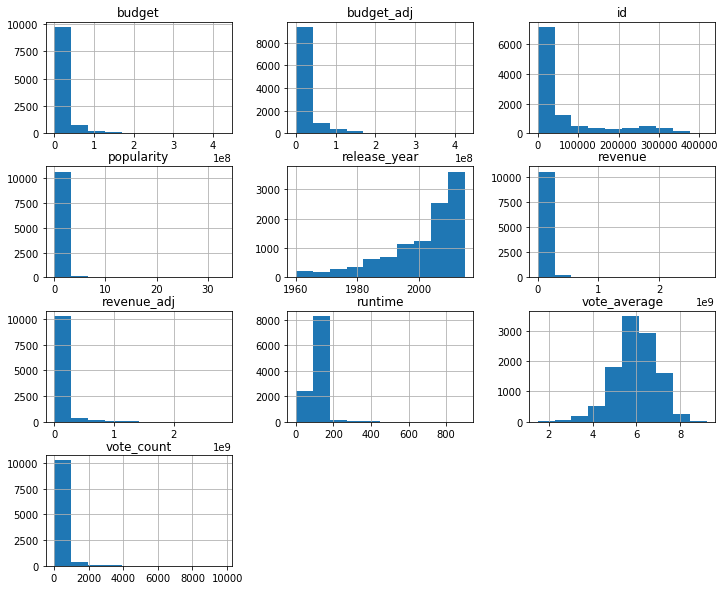

In [5]:
# let's review the histograms of some of the attributes
df_tmdb.hist(figsize=(12,10));

In reviewing the histograms for the attributes that can be measured, we see that the majority of them are skewed to the right.  However, release_year is skewed to the left, as more movies get released year over year. We also see that vote average has more of a bell shaped curve with the mode occurring prior to the value of 6.  

In [6]:
# Would like to review attributes' datatypes
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

id appears to be the wrong type, but plan on removing the attribute later since it's not useful for this investigation. Additionally, release_year should probably be a string, but will leave it as an integer since it's helpful to find out the min and max for earliest release year and latest release year.  Would like to reveal the attribute types I plan on using that reflect object.  My initial assumption is that these are of type string. 

In [7]:
type(df_tmdb['original_title'][0])

str

In [8]:
type(df_tmdb['cast'][0])

str

In [9]:
type(df_tmdb['director'][0])

str

In [10]:
type(df_tmdb['keywords'][0])

str

In [11]:
type(df_tmdb['genres'][0])

str

In [12]:
type(df_tmdb['release_date'][0])

str

release_date should probably be a datetime type as opposed to a string; however, since we already have release_year, will not be using release_date. 

In [13]:
# Would like to view the missing value count for the TMDB dataset for each attribute
df_tmdb.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

The homepage attribute is missing values for just under 80% of the movies. The tagline attribute is missing values for over 25% of the movies. I've decided that neither of these attributes are relevant to my investigation and will opt to have these dropped in the cleaning section of this project along with other columns such as id, imbd_id, and possibly others.     

In [14]:
# Total number of missing values in the dataset
tmdb_null = df_tmdb.isnull().sum().sum()
print(tmdb_null)

13434


13,434 out of 228,186 (10,866 * 21) or ~5.9% of the tmdb dataset includes null values.  These missing values will be handled in the cleaning portion of this Wrangling data stage.  

In [15]:
# checking for any duplicate data
df_tmdb.duplicated().sum()

1

## Data Cleaning

>id, imdb_id, homepage, tagline, and overview will all be dropped since they are not useful to us in our investigation of the dataset. Approximately 6% of the dataset includes missing values. We will be dropping the missing values since in the context, as it does not make sense filling them in for this dataset, whether that's calculating the mean, forward filling, back filling, or linear interpolation. Movies with a value of 0 for budget, revenue, runtime, budget_adj, and revenue_adj, will be dropped from the dataset. 

In [16]:
# Dropping the attributes: id, imdb_id, original_title, homepage, tagline, overview, and release_date
df_tmdb.drop([ 'id', 'imdb_id', 'homepage', 'tagline', 'overview', 'release_date'], axis=1, inplace=True)

In [17]:
# Confirming that the above attributes have been dropped
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 15 columns):
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
director                10822 non-null object
keywords                9373 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: float64(4), int64(5), object(6)
memory usage: 1.2+ MB


We see that the 6 attributes had been dropped from our dataset. We will confirm how many missing values are in each attribute. 

In [18]:
df_tmdb.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
keywords                1493
runtime                    0
genres                    23
production_companies    1030
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

We see that there is still a number of missing values in keywords and production companies in addition to a lesser extent in cast, director, and genres. Additionally, we will need to replace the 0's with null values for budget, revenue, runtime, budget_adj, and revenue_adj in order to include them when dropping the other null values. 

In [19]:
# replacing the 0 values with null values
# guidance reference is from https://machinelearningmastery.com/handle-missing-data-python/
df_tmdb.replace(0, np.NaN, inplace=True)

In [20]:
# confirming that the 0 values are now replaced by missing values by generating the summary statistics
df_tmdb.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,5.170000e+03,4.850000e+03,10835.000000,10866.000000,10866.000000,10866.000000,5.170000e+03,4.850000e+03
mean,0.646441,3.073943e+07,8.922066e+07,102.362898,217.389748,5.974922,2001.322658,3.688774e+07,1.150774e+08
std,1.000185,3.890065e+07,1.620684e+08,30.946957,575.619058,0.935142,12.812941,4.195701e+07,1.988419e+08
min,0.000065,1.000000e+00,2.000000e+00,2.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,0.207583,6.000000e+06,7.708081e+06,90.000000,17.000000,5.400000,1995.000000,8.102293e+06,1.046262e+07
50%,0.383856,1.700000e+07,3.182654e+07,99.000000,38.000000,6.000000,2006.000000,2.272271e+07,4.392749e+07
75%,0.713817,4.000000e+07,9.991823e+07,112.000000,145.750000,6.600000,2011.000000,5.007483e+07,1.315644e+08
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


We see that no more 0 values exist after generating the output above. 

In [21]:
# Let's see the number of missing values from the attributes now
df_tmdb.isnull().sum()

popularity                 0
budget                  5696
revenue                 6016
original_title             0
cast                      76
director                  44
keywords                1493
runtime                   31
genres                    23
production_companies    1030
vote_count                 0
vote_average               0
release_year               0
budget_adj              5696
revenue_adj             6016
dtype: int64

Unfortunately, there are several missing values in our key attributes. We will just have to make due by removing the movies associated with the missing values since I don't feel comfortable with filling in any values such as a mean or through the processes of forward filling, back filling, or linear interpolation. 

In [22]:
# Let's remove the movies that have missing values within any of the remaining attributes
df_tmdb.dropna(axis=0, inplace=True)

In [23]:
# Confirming how many movie titles are left
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3678 entries, 0 to 10848
Data columns (total 15 columns):
popularity              3678 non-null float64
budget                  3678 non-null float64
revenue                 3678 non-null float64
original_title          3678 non-null object
cast                    3678 non-null object
director                3678 non-null object
keywords                3678 non-null object
runtime                 3678 non-null float64
genres                  3678 non-null object
production_companies    3678 non-null object
vote_count              3678 non-null int64
vote_average            3678 non-null float64
release_year            3678 non-null int64
budget_adj              3678 non-null float64
revenue_adj             3678 non-null float64
dtypes: float64(7), int64(2), object(6)
memory usage: 459.8+ KB


We see that approximately one third of the listing of movies remain.  

In [24]:
# let's confirm there are no more missing values 
df_tmdb.isnull().sum()

popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
keywords                0
runtime                 0
genres                  0
production_companies    0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [25]:
# drop any duplicates
df_tmdb.drop_duplicates(inplace=True)

In [26]:
# Would like to see how much the summary statistics have changed since we dropped two thirds of the movies
df_tmdb.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3677.000000,3.677000e+03,3.677000e+03,3677.000000,3677.000000,3677.000000,3677.000000,3.677000e+03,3.677000e+03
mean,1.226051,3.811465e+07,1.114405e+08,109.561327,547.702203,6.182758,2001.091923,4.538793e+07,1.420888e+08
std,1.498897,4.267577e+07,1.793625e+08,19.855075,894.954704,0.789610,11.380391,4.519195e+07,2.195158e+08
min,0.010335,1.000000e+00,2.000000e+00,26.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.861934e+00
25%,0.481276,1.000000e+07,1.489942e+07,96.000000,78.000000,5.700000,1995.000000,1.381637e+07,2.041316e+07
50%,0.830597,2.500000e+07,4.806344e+07,106.000000,219.000000,6.200000,2004.000000,3.108049e+07,6.550727e+07
75%,1.411147,5.000000e+07,1.298324e+08,120.000000,596.000000,6.700000,2010.000000,6.216097e+07,1.704399e+08
max,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


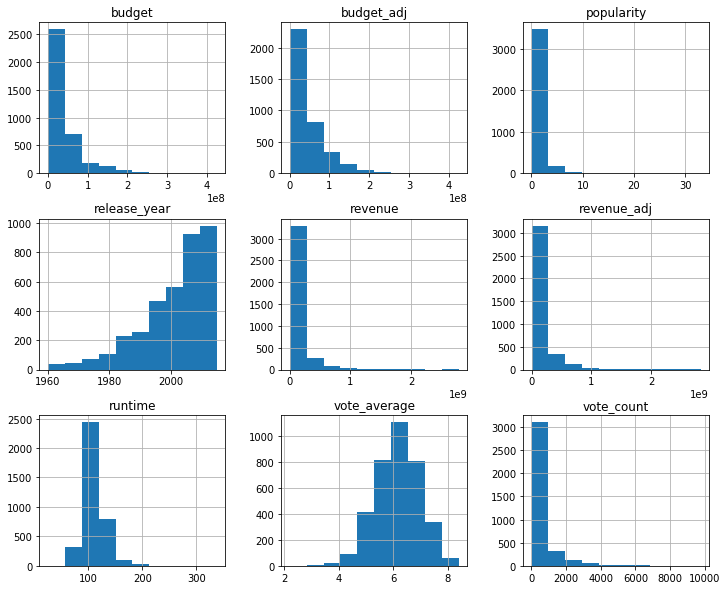

In [27]:
# Would also like to see how the histograms have changed since we dropped two thirds of the movies
df_tmdb.hist(figsize=(12,10));

We see that the majority of the numeric statistics have not changed too drastically in comparison to the full set, except for the counts and some other stats.  Several of the numeric attribute values have increased. Therefore, there may be a slight bias towards these increased values due to the removal of the null values. We can safely assume that the movies that we dropped were less popular, had a lower budget, generated less revenue, and had generally lower ratings with less votes. The release_year attribute's changes appear to be relatively insignificant after dropping the null values. The earliest release is still from 1960 and latest from 2015.  However, the median release_year went from 2006 to 2004.  


<a id='eda'></a>
## Exploratory Data Analysis

> Now that I've trimmed and cleaned the data, I'm ready to move on to the exploration stage of the data with the goal of addressing the research questions that I posed in the Introduction section. 

## I) What is the trending of movies over the years regarding popularity, revenue, and budget?

Text(0.5,1,'Movie Popularity Trending 1960 - 2015')

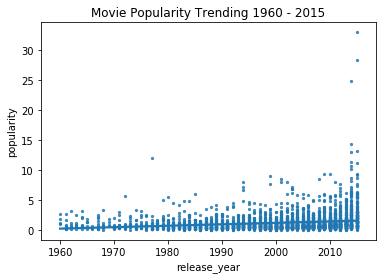

In [28]:
# For the year over year trending, took advantage of Seaborn's plot data and a linear regression model fit regplot package
# https://seaborn.pydata.org/generated/seaborn.regplot.html
# popularity trending
sns.regplot(df_tmdb['release_year'],df_tmdb['popularity'],data=df_tmdb, scatter_kws={"s": 5}, order=1, ci=None, truncate=True)
plt.title('Movie Popularity Trending 1960 - 2015')

From the above summary plot and regression line, movie popularity reflects a trending increase year over year from 1960 to 2015

Text(0.5,1,'Movie Revenue Trending 1960 - 2015')

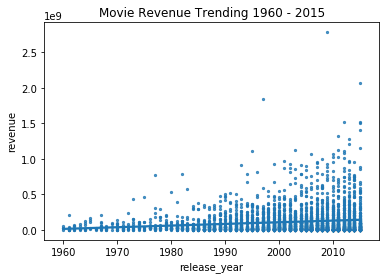

In [29]:
# For the year over year trending, took advantage of Seaborn's plot data and a linear regression model fit regplot package
# https://seaborn.pydata.org/generated/seaborn.regplot.html
# revenue trending
sns.regplot(df_tmdb['release_year'],df_tmdb['revenue'],data=df_tmdb, scatter_kws={"s": 5}, order=1, ci=None, truncate=True)
plt.title('Movie Revenue Trending 1960 - 2015')

From the above summary plot and regression line, movie revenue reflects a trending increase year over year from 1960 to 2015

Text(0.5,1,'Movie Revenue (Adj 2010) Trending 1960 - 2015')

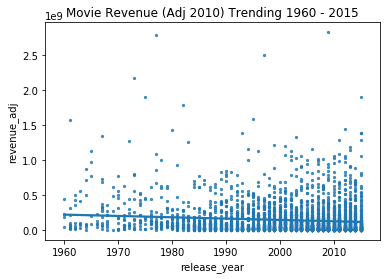

In [30]:
# For the year over year trending, took advantage of Seaborn's plot data and a linear regression model fit regplot package
# https://seaborn.pydata.org/generated/seaborn.regplot.html
# revenue trending, adjusting for 2010 inflation
sns.regplot(df_tmdb['release_year'],df_tmdb['revenue_adj'],data=df_tmdb, scatter_kws={"s": 5}, order=1, ci=None, truncate=True)
plt.title('Movie Revenue (Adj 2010) Trending 1960 - 2015')

From the above summary plot and regression line, when taking 2010 inflation adjustment into account, movie revenue reflects a trending decrease(!) year over year.

Text(0.5,1,'Movie Budget Trending 1960 - 2015')

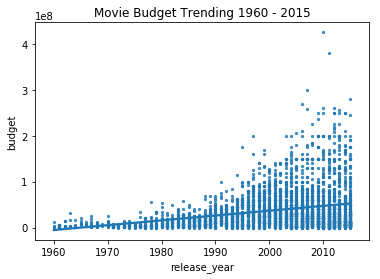

In [31]:
# For the year over year trending, took advantage of Seaborn's plot data and a linear regression model fit regplot package
# https://seaborn.pydata.org/generated/seaborn.regplot.html
# budget trending
sns.regplot(df_tmdb['release_year'],df_tmdb['budget'],data=df_tmdb, scatter_kws={"s": 5}, order=1, ci=None, truncate=True)
plt.title('Movie Budget Trending 1960 - 2015')

From the above summary plot and regression line, movie budget reflects a trending increase year over year.

Text(0.5,1,'Movie Budget (Adj 2010) Trending 1960 - 2015')

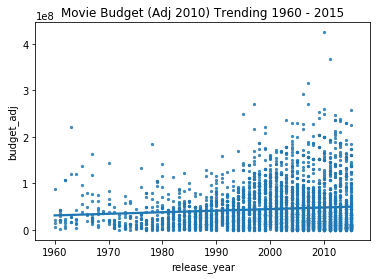

In [32]:
# For the year over year trending, took advantage of Seaborn's plot data and a linear regression model fit regplot package
# https://seaborn.pydata.org/generated/seaborn.regplot.html
# budget trending, adjusting for 2010 inflation
sns.regplot(df_tmdb['release_year'],df_tmdb['budget_adj'],data=df_tmdb, scatter_kws={"s": 5}, order=1, ci=None, truncate=True)
plt.title('Movie Budget (Adj 2010) Trending 1960 - 2015')

From the above summary plot and regression line, even with the adjusted 2010 inflation, movie budget still reflects a trending increase year over year.

## II) What characteristics are associated with movies that are more popular?

### 2a) What genres are most frequent as well as those that tend to be associated with movies having a higher popularity score?

In [33]:
# Split the genres text from the pipes into multiple rows
# see https://stackoverflow.com/questions/17116814/pandas-how-do-i-split-text-in-a-column-into-multiple-rows
from pandas import Series
genre_desc = df_tmdb['genres'].str.split('|').apply(Series, 1).stack()
genre_desc.index = genre_desc.index.droplevel(-1) # to line up with df's index
genre_desc.name = 'genres' # needs a name to join
genre_desc

0                 Action
0              Adventure
0        Science Fiction
0               Thriller
1                 Action
1              Adventure
1        Science Fiction
1               Thriller
2              Adventure
2        Science Fiction
2               Thriller
3                 Action
3              Adventure
3        Science Fiction
3                Fantasy
4                 Action
4                  Crime
4               Thriller
5                Western
5                  Drama
5              Adventure
5               Thriller
6        Science Fiction
6                 Action
6               Thriller
6              Adventure
7                  Drama
7              Adventure
7        Science Fiction
8                 Family
              ...       
10779             Comedy
10779              Drama
10780             Horror
10780           Thriller
10780    Science Fiction
10780            Mystery
10788          Adventure
10788             Family
10788            Fantasy


In [34]:
# Create a new data frame after deleting the original genres column and then joining the generes split from the pipe character
# see https://stackoverflow.com/questions/17116814/pandas-how-do-i-split-text-in-a-column-into-multiple-rows
del df_tmdb['genres']
df_tmdb_genre = df_tmdb.join(genre_desc)
df_tmdb_genre.head()



,popularity,budget,revenue,original_title,cast,director,keywords,runtime,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,Action
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,Adventure
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,Science Fiction
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,Thriller
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120.0,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08,Action


In [35]:
# List the frequency of each movie genre type
df_tmdb_genre.genres.value_counts()

Drama              1666
Comedy             1280
Thriller           1159
Action             1043
Adventure           725
Romance             628
Crime               628
Science Fiction     510
Horror              445
Family              403
Fantasy             385
Mystery             337
Animation           195
Music               125
History             125
War                 116
Western              51
Documentary          26
Foreign               7
TV Movie              1
Name: genres, dtype: int64

In [36]:
# Assign each of the genres with an average popularity value
# https://stackoverflow.com/questions/30482071/how-to-calculate-mean-values-grouped-on-another-column-in-pandas
grouped_genrepopmean = df_tmdb_genre.groupby('genres', as_index=False)['popularity'].mean()
# sort each genre by mean popularity value
# https://stackoverflow.com/questions/27018622/pandas-groupby-sort-descending-order
sorted_genre_bypopmean = grouped_genrepopmean.sort_values('popularity', ascending=False)

Text(0.5,1,'Average Movie Popularity by Genre')

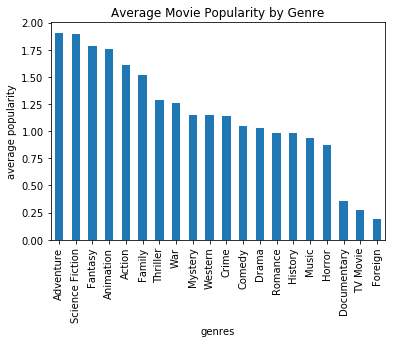

In [37]:
# Create a  bar chart of the different genres and their mean popularity
sorted_genre_bypopmean.sort_values('popularity', ascending=False)[['genres','popularity']].plot.bar(x='genres', legend=False)
plt.ylabel('average popularity')
plt.title('Average Movie Popularity by Genre')

The top 5 genres in the updated cleaned dataset by rank in descending order of highest average popularity are: 
> 1) Adventure
> 2) Science Fiction
> 3) Fantasy
> 4) Animation
> 5) Action 

The bottom 5 genres in the updated cleaned dataset by rank in ascending order of lowest average popularity are: 
> 1) Foreign
> 2) TV Movie
> 3) Documentary 
> 4) Horror
> 5) Music

In [38]:
# Assign each of the genres with a median popularity value
# https://stackoverflow.com/questions/30482071/how-to-calculate-mean-values-grouped-on-another-column-in-pandas
grouped_genrepopmedian = df_tmdb_genre.groupby('genres', as_index=False)['popularity'].median()
# sort each genre by median popularity value
# https://stackoverflow.com/questions/27018622/pandas-groupby-sort-descending-order
sorted_genre_bypopmedian = grouped_genrepopmedian.sort_values('popularity', ascending=False)

Text(0.5,1,'Median Movie Popularity by Genre')

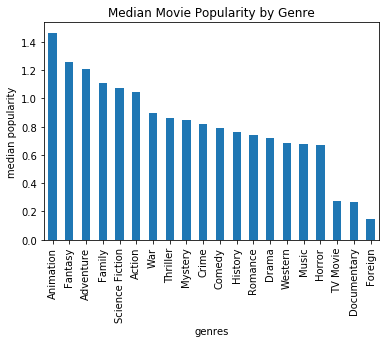

In [39]:
# Create a  bar chart of the different genres and their median popularity
sorted_genre_bypopmedian.sort_values('popularity', ascending=False)[['genres','popularity']].plot.bar(x='genres', legend=False)
plt.ylabel('median popularity')
plt.title('Median Movie Popularity by Genre')

The top 5 genres in the updated cleaned dataset by rank in descending order of highest median popularity are: 
> 1) Animation
> 2) Fantasy
> 3) Adventure
> 4) Family
> 5) Science Fiction

The top 5 genres in the updated cleaned dataset by rank in ascending order of lowest median popularity are: 
> 1) Foreign
> 2) Documentary
> 3) TV Movie 
> 4) Horror
> 5) Music

### 2b) What keywords are most frequent as well as what keywords tend to associate with movies that have a higher popularity score?

In [40]:
# Split the keywords text from the pipes into multiple rows
# create a new data frame after deleting the original keywords column and then joining the keywords split from the pipe character
# see https://stackoverflow.com/questions/17116814/pandas-how-do-i-split-text-in-a-column-into-multiple-rows
keyword_desc = df_tmdb['keywords'].str.split('|').apply(Series, 1).stack()
keyword_desc.index = keyword_desc.index.droplevel(-1) # to line up with df's index
keyword_desc.name = 'keywords' # needs a name to join
del df_tmdb['keywords']
df_tmdb_keyword = df_tmdb.join(keyword_desc)
df_tmdb_keyword.head()

,popularity,budget,revenue,original_title,cast,director,runtime,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,keywords
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,monster
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,dna
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,tyrannosaurus rex
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,velociraptor
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,island


In [41]:
# List the movie keywords that occur the most and least frequently
df_tmdb_keyword.keywords.value_counts()

based on novel                  166
duringcreditsstinger            101
dystopia                         95
sex                              89
new york                         84
independent film                 78
prison                           74
sport                            73
murder                           69
woman director                   68
biography                        64
london                           61
female nudity                    59
musical                          54
sequel                           53
father-son relationship          51
corruption                       49
nudity                           48
aftercreditsstinger              47
brother brother relationship     46
suspense                         45
revenge                          45
suicide                          44
martial arts                     43
high school                      43
world war ii                     43
police                           42
cia                         

We see that the top 10 most frequently used keywords for movies are in descending order:
> 1) based on novel 2) duringcreditsstinger 3) dystopia 4) sex 5) new york 6) independent film 7) prison 8) sport 9) murder 10) woman director

Since there are so many keywords that only occur once, it doesn't make sense to include an exhaustive list of the least frequently used keywords. 

In [42]:
# Let's see if we can guess at least one of the most popular movies by keywords only
# see http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html#pandas.DataFrame.sort_values
topkwords_by_pop = df_tmdb_keyword.sort_values(['popularity','keywords'], ascending=False)
top20kwords_by_pop = topkwords_by_pop[['popularity','keywords']].head(20)
top20kwords_by_pop

,popularity,keywords
0,32.985763,velociraptor
0,32.985763,tyrannosaurus rex
0,32.985763,monster
0,32.985763,island
0,32.985763,dna
1,28.419936,post-apocalyptic
1,28.419936,future
1,28.419936,dystopia
1,28.419936,chase
1,28.419936,australia


The keywords associated with index 0 appears to be associated with one of the Jurassic Park movies; the keywords associated with index 1 must be associated with a Mad Max movie; the keywords associated with index 629 might be E.T., but doesn't make sense with "father-son relationship"; the keywords associated with index 630 probably is an Avengers movie. Let's see...

In [43]:
# Most popular movie
df_tmdb.loc[0]

popularity                                                        32.9858
budget                                                            1.5e+08
revenue                                                       1.51353e+09
original_title                                             Jurassic World
cast                    Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...
director                                                  Colin Trevorrow
runtime                                                               124
production_companies    Universal Studios|Amblin Entertainment|Legenda...
vote_count                                                           5562
vote_average                                                          6.5
release_year                                                         2015
budget_adj                                                       1.38e+08
revenue_adj                                                   1.39245e+09
Name: 0, dtype: object

In [44]:
# 2nd most popular movie
df_tmdb.loc[1]

popularity                                                        28.4199
budget                                                            1.5e+08
revenue                                                       3.78436e+08
original_title                                         Mad Max: Fury Road
cast                    Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...
director                                                    George Miller
runtime                                                               120
production_companies    Village Roadshow Pictures|Kennedy Miller Produ...
vote_count                                                           6185
vote_average                                                          7.1
release_year                                                         2015
budget_adj                                                       1.38e+08
revenue_adj                                                   3.48161e+08
Name: 1, dtype: object

In [45]:
# 3rd most popular movie
df_tmdb.loc[629]

popularity                                                        24.9491
budget                                                           1.65e+08
revenue                                                       6.21752e+08
original_title                                               Interstellar
cast                    Matthew McConaughey|Jessica Chastain|Anne Hath...
director                                                Christopher Nolan
runtime                                                               169
production_companies    Paramount Pictures|Legendary Pictures|Warner B...
vote_count                                                           6498
vote_average                                                            8
release_year                                                         2014
budget_adj                                                     1.5198e+08
revenue_adj                                                   5.72691e+08
Name: 629, dtype: object

In [46]:
# 4th most popular movie
df_tmdb.loc[630]

popularity                                                        14.3112
budget                                                            1.7e+08
revenue                                                       7.73312e+08
original_title                                    Guardians of the Galaxy
cast                    Chris Pratt|Zoe Saldana|Dave Bautista|Vin Dies...
director                                                       James Gunn
runtime                                                               121
production_companies    Marvel Studios|Moving Picture Company (MPC)|Bu...
vote_count                                                           5612
vote_average                                                          7.9
release_year                                                         2014
budget_adj                                                    1.56585e+08
revenue_adj                                                   7.12291e+08
Name: 630, dtype: object

In [47]:
# Assign each of the keywords with a mean popularity value
# https://stackoverflow.com/questions/30482071/how-to-calculate-mean-values-grouped-on-another-column-in-pandas
grouped_keypopmean = df_tmdb_keyword.groupby('keywords', as_index=False)['popularity'].mean()
# sort each keyword by mean popularity value
# https://stackoverflow.com/questions/27018622/pandas-groupby-sort-descending-order
sorted_key_bypopmean = grouped_keypopmean.sort_values('popularity', ascending=False)
sorted_key_bypopmean

,keywords,popularity
3682,scene during end credits,14.311205
2442,lightsaber,12.037933
1977,hermit,12.037933
4560,velociraptor,11.121115
3978,space war,9.432768
2925,nihilism,8.947905
2629,massage,8.093754
1210,dna,7.729145
3969,space colony,7.460605
2718,minions,7.404165


We see that the top 10 keywords sorted by mean popularity score are in descending order: 
> 1) scene during end credits	2) lightsaber 3) hermit 4) velciraptor 5) space war 6) nihilism 7) message 8) dna 
9) space colony 10) minions	

We see that the bottom 10 keywords sorted by mean popularity score in ascending order are: 
> 1) soviet troops 2) joseph stalin 3) forbidden zone 4) waif 5) creationist film 6) creationism 7) critically bashed 8) goat
9) maori 10) crisis line

In [48]:
# Assign each of the keywords with a median popularity value
# https://stackoverflow.com/questions/30482071/how-to-calculate-mean-values-grouped-on-another-column-in-pandas
grouped_keypop = df_tmdb_keyword.groupby('keywords', as_index=False)['popularity'].median()
# sort each keyword by median popularity value
# https://stackoverflow.com/questions/27018622/pandas-groupby-sort-descending-order
sorted_key_bypop = grouped_keypop.sort_values('popularity', ascending=False)
sorted_key_bypop

,keywords,popularity
3682,scene during end credits,14.311205
2442,lightsaber,12.037933
1977,hermit,12.037933
3978,space war,9.432768
2925,nihilism,8.947905
2629,massage,8.093754
2695,middle-earth (tolkien),7.608865
3017,orcs,7.608865
3969,space colony,7.460605
1405,evil mastermind,7.404165


We see that the top 10 keywords sorted by median popularity score are in descending order: 
> 1) scene during end credits	2) lightsaber 3) hermit 4) space war 5) nihilism 6) massage 7) middle-earth (tolkien) 8) orcs 
9) space colony 10) evil mastermind	

We see that the bottom 10 keywords sorted by median popularity score in ascending order are: 
> 1) joseph stalin 2) soviet troops 3) forbidden zone 4) waif 5) creationist film 6) creationism 7) critically bashed 8) goat
9) maori 10) crisis line

### 2c) What cast members tend to be associated with higher popularity scored movies?

In [49]:
# Split the cast text from the pipes into multiple rows
# create a new data frame after deleting the original cast column and then joining the cast split from the pipe character
# see https://stackoverflow.com/questions/17116814/pandas-how-do-i-split-text-in-a-column-into-multiple-rows
cast_desc = df_tmdb['cast'].str.split('|').apply(Series, 1).stack()
cast_desc.index = cast_desc.index.droplevel(-1) # to line up with df's index
cast_desc.name = 'cast' # needs a name to join
del df_tmdb['cast']
df_tmdb_cast = df_tmdb.join(cast_desc)
df_tmdb_cast.head()

,popularity,budget,revenue,original_title,director,runtime,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,cast
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124.0,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,Chris Pratt
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124.0,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,Bryce Dallas Howard
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124.0,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,Irrfan Khan
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124.0,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,Vincent D'Onofrio
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124.0,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,Nick Robinson


In [50]:
# List the cast members that occur in the most movies
df_tmdb_cast.cast.value_counts()

Robert De Niro              50
Bruce Willis                46
Samuel L. Jackson           43
Nicolas Cage                42
Johnny Depp                 35
Brad Pitt                   34
Tom Hanks                   34
Matt Damon                  34
Morgan Freeman              34
Tom Cruise                  33
Harrison Ford               32
Eddie Murphy                32
Denzel Washington           32
Sylvester Stallone          31
Liam Neeson                 29
Robin Williams              29
Arnold Schwarzenegger       29
Mark Wahlberg               29
Meryl Streep                29
Owen Wilson                 29
Ewan McGregor               28
Julianne Moore              28
Dennis Quaid                28
Willem Dafoe                28
Gene Hackman                28
Ben Affleck                 28
Cameron Diaz                28
Jim Carrey                  27
Nicole Kidman               27
Colin Farrell               27
                            ..
Mary Beth Hurt               1
Laura Ca

The top 10 cast members who show up in the most movies in descending order are: 
1) Robert Di Nero
2) Bruce Willis
3) Samuel Jackson
4) Nicolas Cage
5) Johnny Depp
6) Morgan Freeman
7) Tom Hanks
8) Matt Damon
9) Brad Pitt
10) Tom Cruise

Since there are so many cast members (6,589 total) that only occur once, it doesn't make sense to list all of these for the least frequently listed cast members.

In [51]:
# Assign each of the cast members with their movies' average popularity value
# https://stackoverflow.com/questions/30482071/how-to-calculate-mean-values-grouped-on-another-column-in-pandas
grouped_castpopmean = df_tmdb_cast.groupby('cast', as_index=False)['popularity'].mean()
# sort each cast member by their movies' mean popularity value
# https://stackoverflow.com/questions/27018622/pandas-groupby-sort-descending-order
sorted_cast_bypopmean = grouped_castpopmean.sort_values('popularity', ascending=False)
sorted_cast_bypopmean

,cast,popularity
4680,Nick Robinson,32.985763
3272,Josh Helman,28.419936
2453,Hugh Keays-Byrne,15.215979
1549,Dean Winters,11.422751
1336,Daisy Ridley,11.173104
2512,Irrfan Khan,9.255885
4875,Paul Anderson,9.110700
6115,Theo James,8.762993
6011,T.J. Miller,8.691294
1384,Daniel Henney,8.691294


We see that the cast members with highest average popularity scores for all the movies they acted in by descending order are: 
> 1) Nick Robinson	2) Josh Helman 3) Hugh Keays-Byrne 4) Dean Winters 5) Daisy Ridley 6) Paul Anderson 7) Daniel Henney 8) Ryan Potter 9) T.J. Miller 10) Scott Adsit	

Conversely, we see that the cast members with the lowest average popularity scores for all the movies they acted in by ascending order are:  
> 1) Maria Smolnikova 2) Philippe Reinhardt	3) Heiner Lauterbach 4) Yanina Studilina 5) Deborah Pratt 6) Peter Strauss 7) Nathan Bexton	8) Lori Heuring 9) Tess Harper 10) Susan Ward

Does the popularity ranking of cast members change much when calculating by median instead of average? 

In [52]:
# Assign each of the cast members with their movies' median popularity value
# https://stackoverflow.com/questions/30482071/how-to-calculate-mean-values-grouped-on-another-column-in-pandas
grouped_castpopmedian = df_tmdb_cast.groupby('cast', as_index=False)['popularity'].median()
# sort each cast member by their movies' median popularity value
# https://stackoverflow.com/questions/27018622/pandas-groupby-sort-descending-order
sorted_cast_bypopmedian = grouped_castpopmedian.sort_values('popularity', ascending=False)
sorted_cast_bypopmedian

,cast,popularity
4680,Nick Robinson,32.985763
3272,Josh Helman,28.419936
2453,Hugh Keays-Byrne,15.215979
1549,Dean Winters,11.422751
1336,Daisy Ridley,11.173104
4875,Paul Anderson,9.110700
1384,Daniel Henney,8.691294
5510,Ryan Potter,8.691294
6011,T.J. Miller,8.691294
5635,Scott Adsit,8.691294


As we see from the above output, the mean and median generates the exact same ranking of cast members by movie popularity. 

It's interesting to see that the cast members with average popularity scores are people who I am not aware of.  My suspicion is that they are not cast in many movies. Let's set a threshold and include cast members who were in more than 5 movies from this dataset. My suspicion is that the cast will be recognized as well as the ranking of mean vs. median reflect differences.   

In [53]:
# https://stackoverflow.com/questions/32511061/remove-low-frequency-values-from-pandas-dataframe
threshold = 5  # Remove items less than or equal to threshold
for cast in df_tmdb_cast:
    vc = df_tmdb_cast[cast].value_counts()
    vals_to_remove = vc[vc <= threshold].index.values
    df_tmdb_cast[cast].loc[df_tmdb_cast['cast'].isin(vals_to_remove)] = None

C:\Users\ptta001\anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [54]:
# Confirm that the above code includes only those cast members who have been in more than 5 of the dataset's movies
df_tmdb_cast.cast.value_counts()

Robert De Niro           50
Bruce Willis             46
Samuel L. Jackson        43
Nicolas Cage             42
Johnny Depp              35
Matt Damon               34
Brad Pitt                34
Tom Hanks                34
Morgan Freeman           34
Tom Cruise               33
Eddie Murphy             32
Harrison Ford            32
Denzel Washington        32
Sylvester Stallone       31
Robin Williams           29
Mark Wahlberg            29
Meryl Streep             29
Owen Wilson              29
Liam Neeson              29
Arnold Schwarzenegger    29
Gene Hackman             28
Julianne Moore           28
Ewan McGregor            28
Dennis Quaid             28
Cameron Diaz             28
Willem Dafoe             28
Ben Affleck              28
Jim Carrey               27
Colin Farrell            27
Nicole Kidman            27
                         ..
Mimi Rogers               6
Justin Bartha             6
Kenneth Branagh           6
Gary Busey                6
Barbra Streisand    

We see that the above code did reflect output including only those cast members (total 771) who were in more than 5 movies from the modified dataset.  We will see if those cast members are more well known and whether there is a difference in their movie popularity rankings between the mean vs. median. 

In [55]:
# Assign each of the cast members who were cast in more than 5 movies with their movies' average popularity value
# https://stackoverflow.com/questions/30482071/how-to-calculate-mean-values-grouped-on-another-column-in-pandas
grouped_castpopmean = df_tmdb_cast.groupby('cast', as_index=False)['popularity'].mean()
# sort each cast member who were cast in more than 5 movies by their movies' mean popularity value
# https://stackoverflow.com/questions/27018622/pandas-groupby-sort-descending-order
sorted_cast_bypopmean = grouped_castpopmean.sort_values('popularity', ascending=False)
sorted_cast_bypopmean

,cast,popularity
128,Chris Pratt,6.816003
92,Bryce Dallas Howard,6.756544
567,Nicholas Hoult,5.860777
727,Tom Hardy,5.765765
101,Carrie Fisher,5.374329
652,Rupert Grint,5.268860
574,Orlando Bloom,4.375289
230,Emma Watson,4.369001
166,Daniel Radcliffe,4.168494
287,Hugo Weaving,3.971691


We see that the cast members in more than 5 movies with the highest average popularity scores for all the movies they acted in by descending order are: 
> 1) Chris Pratt	2) Bryce Dallas Howard 3) Nicholas Hoult 4) Tom Hardy 5) Carrie Fisher 6) Rupert Grint 7) Orlando Bloom 8) Emma Watson 9) Daniel Radcliffe 10) Hugo Weaving	

Conversely, we see that the cast members in more than 5 movies with the lowest average popularity scores for all the movies they acted in by ascending order are:  
> 1) Derek Luke 2) Ben Johnson	3) Mia Farrow 4) Rebecca De Mornay 5) Mike Epps 6) David Duchovny 7) Ali Larter	8) John Lovitz 9) Dylan Baker 10) Madonna

In [56]:
# Assign each of the cast members who were cast in more than 5 movies with their movies' median popularity value
# https://stackoverflow.com/questions/30482071/how-to-calculate-mean-values-grouped-on-another-column-in-pandas
grouped_castpopmedian = df_tmdb_cast.groupby('cast', as_index=False)['popularity'].median()
# sort each cast member who were cast in more than 5 movies by their movies' median popularity value
# https://stackoverflow.com/questions/27018622/pandas-groupby-sort-descending-order
sorted_cast_bypopmedian = grouped_castpopmedian.sort_values('popularity', ascending=False)
sorted_cast_bypopmedian

,cast,popularity
652,Rupert Grint,5.711315
166,Daniel Radcliffe,4.977317
230,Emma Watson,4.977317
101,Carrie Fisher,4.828854
574,Orlando Bloom,4.205992
290,Ian McKellen,3.937234
287,Hugo Weaving,3.823173
504,Martin Freeman,3.652984
187,Denis Leary,3.135776
683,Sharlto Copley,3.023253


We see that the cast members in more than 5 movies with the highest median popularity scores for all the movies they acted in by descending order are: 
> 1) Rupert Grint	2) Daniel Radcliffe 3) Emma Watson 4) Carrie Fisher 5) Orlando Bloom 6) Ian McKellen 7) Hugo Weaving 8) Martin Freeman 9) Denis Leary 10) Sharlto Copley	

Conversely, we see that the cast members in more than 5 movies with the lowest median popularity scores for all the movies they acted in by ascending order are:  
> 1) Lara Flynn Boyle 2) Dave Chappelle	3) Chi McBride 4) Treat Williams 5) Ben Johnson 6) Faye Dunaway 7) Charlotte Rampling	8) Jennifer Beals 9) Derek Luke 10) Daniel Stern

### 2d) Does a higher vote average tend to be associated with greater popularity? 

Text(0.5,1,'Vote Average and Popularity Trending')

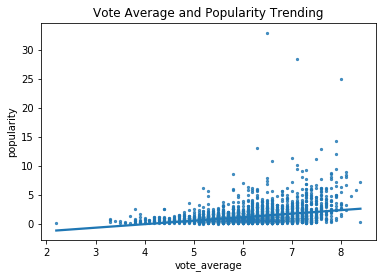

In [57]:
# For the vote average and popularity trending, took advantage of Seaborn's plot data and a linear regression model fit regplot package
# https://seaborn.pydata.org/generated/seaborn.regplot.html
sns.regplot(df_tmdb['vote_average'],df_tmdb['popularity'],data=df_tmdb, scatter_kws={"s": 5}, order=1, ci=None, truncate=True)
plt.title('Vote Average and Popularity Trending')

From the above summary plot and regression line, a higher movie vote average reflects a positive trend with increasing popularity.

### 2e) What is the runtime of movies that tend to be most popular?

Let's first look at the trending of runtime through the years

Text(0.5,1,'Movie Runtime (in minutes) Trending 1960 - 2015')

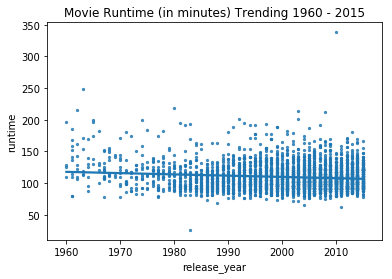

In [58]:
# For the year over year trending, took advantage of Seaborn's plot data and a linear regression model fit regplot package
# https://seaborn.pydata.org/generated/seaborn.regplot.html
# revenue trending
sns.regplot(df_tmdb['release_year'],df_tmdb['runtime'],data=df_tmdb, scatter_kws={"s": 5}, order=1, ci=None, truncate=True)
plt.title('Movie Runtime (in minutes) Trending 1960 - 2015')

Interesting...from the generated data, it appears that movies have gradually become shorter by runtime (in minutes) year over year. 

Text(0.5,1,'Runtime and Popularity Trending')

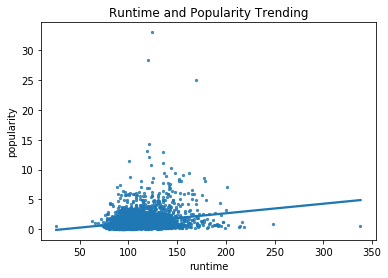

In [59]:
# For the runtime and popularity trending, took advantage of Seaborn's plot data and a linear regression model fit regplot package
# https://seaborn.pydata.org/generated/seaborn.regplot.html
sns.regplot(df_tmdb['runtime'],df_tmdb['popularity'],data=df_tmdb, scatter_kws={"s": 5}, order=1, ci=None, truncate=True)
plt.title('Runtime and Popularity Trending')

In general, it appears that the longer movies, given that they are over 100 and under 200 minutes are generally more popular than much shorter or much longer movies. Most movies appear to be most clustered between 100 and 150 minutes. 

### 2f) What production companies are associated with movies that are more popular? 

In [60]:
# Split the cast text from the pipes into multiple rows
# create a new data frame after deleting the original production_companies column and then joining the split from the pipe character
# see https://stackoverflow.com/questions/17116814/pandas-how-do-i-split-text-in-a-column-into-multiple-rows
prodco_desc = df_tmdb['production_companies'].str.split('|').apply(Series, 1).stack()
prodco_desc.index = prodco_desc.index.droplevel(-1) # to line up with df's index
prodco_desc.name = 'production_companies' # needs a name to join
del df_tmdb['production_companies']
df_tmdb_prodco = df_tmdb.join(prodco_desc)
df_tmdb_prodco.head()

,popularity,budget,revenue,original_title,director,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,production_companies
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124.0,5562,6.5,2015,1.379999e+08,1.392446e+09,Universal Studios
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124.0,5562,6.5,2015,1.379999e+08,1.392446e+09,Amblin Entertainment
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124.0,5562,6.5,2015,1.379999e+08,1.392446e+09,Legendary Pictures
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124.0,5562,6.5,2015,1.379999e+08,1.392446e+09,Fuji Television Network
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124.0,5562,6.5,2015,1.379999e+08,1.392446e+09,Dentsu


In [61]:
# List the production companies that produce the most movies
df_tmdb_prodco.production_companies.value_counts()

Universal Pictures                               322
Warner Bros.                                     318
Paramount Pictures                               266
Twentieth Century Fox Film Corporation           196
Columbia Pictures                                177
New Line Cinema                                  146
Walt Disney Pictures                             114
Touchstone Pictures                              112
Metro-Goldwyn-Mayer (MGM)                        108
Columbia Pictures Corporation                    100
Relativity Media                                  99
Miramax Films                                     81
TriStar Pictures                                  74
Village Roadshow Pictures                         73
DreamWorks SKG                                    72
Regency Enterprises                               67
Summit Entertainment                              50
Dimension Films                                   50
Dune Entertainment                            

The top 10 production companies who produce the most movies in descending order are: 
> 1) Universal Pictures 2) Warner Bros. 3) Paramount Pictures 4) Twentieth Century Fox Film Corporation 5) Columbia Pictures   6) New Line Cinema 7) Walt Disney Pictures 8) Touchstone Pictures 9) Metro-Goldwyn-Mayer (MGM) 10) Columbia Pictures Corporation             

In [62]:
# Assign each of the production companies with their movies' average popularity value
# https://stackoverflow.com/questions/30482071/how-to-calculate-mean-values-grouped-on-another-column-in-pandas
grouped_prodcopopmean = df_tmdb_prodco.groupby('production_companies', as_index=False)['popularity'].mean()
# sort each production company by their movies' mean popularity value
# https://stackoverflow.com/questions/27018622/pandas-groupby-sort-descending-order
sorted_prodco_bypopmean = grouped_prodcopopmean.sort_values('popularity', ascending=False)
sorted_prodco_bypopmean

,production_companies,popularity
437,Bulletproof Cupid,14.311205
1101,Fuji Television Network,12.777401
1699,Lynda Obst Productions,12.763163
1718,MJW Films,11.422751
762,DefyNite Films,11.422751
2891,Truenorth Productions,11.173104
27,3Foot7,10.174599
1644,Linson Films,8.947905
240,Atman Entertainment,8.947905
411,Bristol Automotive,8.110711


We see that the production companies with the highest average popularity scores for all the movies they produced by descending order are: 
> 1) Bulletproof Cupid	2) Fuji Television Network 3) LYnda Obst Productions 4) MJW Films 5) DefyNite Films 6) Truenorth Productions 7) 3Foot7 8) Linson Films 9) Atman Entertainment 10) Bristol Automotive	

Similarly to the unknown cast members in the original popularity ranking, I have not heard of any of the top 10 production companies with the highest average popularity scores. My suspicion is that they did not produce many movies. Let's set a threshold for those production companies who produced more than 5 movies from this dataset. My suspicion is that the production companies will be recognized.

In [63]:
# https://stackoverflow.com/questions/32511061/remove-low-frequency-values-from-pandas-dataframe
threshold = 5  # Remove items less than or equal to threshold
for production_companies in df_tmdb_prodco:
    vc = df_tmdb_prodco[production_companies].value_counts()
    vals_to_remove = vc[vc <= threshold].index.values
    df_tmdb_prodco[production_companies].loc[df_tmdb_prodco['production_companies'].isin(vals_to_remove)] = None

C:\Users\ptta001\anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [64]:
# Confirm that the above code includes only those production companies that have produced more than 5 of the dataset's movies
df_tmdb_prodco.production_companies.value_counts()

Universal Pictures                        322
Warner Bros.                              318
Paramount Pictures                        266
Twentieth Century Fox Film Corporation    196
Columbia Pictures                         177
New Line Cinema                           146
Walt Disney Pictures                      114
Touchstone Pictures                       112
Metro-Goldwyn-Mayer (MGM)                 108
Columbia Pictures Corporation             100
Relativity Media                           99
Miramax Films                              81
TriStar Pictures                           74
Village Roadshow Pictures                  73
DreamWorks SKG                             72
Regency Enterprises                        67
Dimension Films                            50
Summit Entertainment                       50
Dune Entertainment                         49
Amblin Entertainment                       48
United Artists                             44
Lionsgate                         

In [65]:
# Assign each of the production companies that produced more than 5 movies with their movies' average popularity value
# https://stackoverflow.com/questions/30482071/how-to-calculate-mean-values-grouped-on-another-column-in-pandas
grouped_prodcopopmean = df_tmdb_prodco.groupby('production_companies', as_index=False)['popularity'].mean()
# sort each production company that produced more than 5 movies by their movies' mean popularity value
# https://stackoverflow.com/questions/27018622/pandas-groupby-sort-descending-order
sorted_prodco_bypopmean = grouped_prodcopopmean.sort_values('popularity', ascending=False)
sorted_prodco_bypopmean

,production_companies,popularity
250,Syncopy,7.903816
170,Marvel Studios,6.800938
277,Universal Studios,5.059040
68,Dentsu,4.949247
211,Red Wagon Entertainment,4.815415
119,Heyday Films,4.693828
142,Kennedy Miller Productions,4.668937
5,A Band Apart,4.581651
297,WingNut Films,4.167958
181,Moving Picture Company (MPC),4.155241


We see that the production companies that produced more than 5 movies with the highest average popularity scores for all the movies they produced by descending order are: 
> 1) Syncopy	2) Marvel Studios 3) Universal Studios 4) Dentsu 5) Red Wagon Entertainment 6) Heyday Films 7) Kennedy Miller Productions 8) A Band Apart 9) WingNut Films 10) Moving Picture Company (MPC)	

Conversely, we see that the production companies that produced more than 5 movies with the lowest average popularity scores for all the movies they produced by ascending order are:  
> 1) Empire Pictures 2) Destination Films	3) France 2 CinÃ©ma 4) Fine Line Features 5) Beacon Pictures 6) Franchise Pictures 7) Golan-Clobus Productions	8) Industry Entertainment 9) Affirm Films 10) Warner Bros. Pictures

In [66]:
# Assign each of the production companies that produced more than 5 movies with their movies' median popularity value
# https://stackoverflow.com/questions/30482071/how-to-calculate-mean-values-grouped-on-another-column-in-pandas
grouped_prodcopopmedian = df_tmdb_prodco.groupby('production_companies', as_index=False)['popularity'].median()
# sort each production company that produced more than 5 movies by their movies' median popularity value
# https://stackoverflow.com/questions/27018622/pandas-groupby-sort-descending-order
sorted_prodco_bypopmedian = grouped_prodcopopmedian.sort_values('popularity', ascending=False)
sorted_prodco_bypopmedian

,production_companies,popularity
250,Syncopy,5.996052
170,Marvel Studios,5.639022
5,A Band Apart,5.316813
119,Heyday Films,5.076472
252,TSG Entertainment,4.210699
297,WingNut Films,3.744956
211,Red Wagon Entertainment,3.735939
155,Lucasfilm,3.457537
202,Pixar Animation Studios,3.339270
146,LStar Capital,3.133546


We see that the cast members in more than 5 movies with the highest median popularity scores for all the movies they acted in by descending order are: 
> 1) Syncopy	2) Marvel Studios 3) A Band Apart 4) Heyday Films 5) TSG Entertainment 6) WingNut Films 7) Red Wagon Entertainment 8) Lucasfilm 9) Pixar Animation Studios 10) LStar Capital	

Conversely, we see that the cast members in more than 5 movies with the lowest median popularity scores for all the movies they acted in by ascending order are:  
> 1) Destination Films 2) Empire Pictures	3) France 2 CinÃ©ma 4) Rysher Entertainment 5) Fine Line Features 6) Stage 6 Films 7) Killer Films	8) Golan-Globus Productions 9) 20th Century Fox 10) Donners' Company

### 2g) Which directors tend to be associated with movies that are more popular?

In [67]:
# Split the director text from the pipes into multiple rows
# create a new data frame after deleting the original director column and then joining the director split from the pipe character
# see https://stackoverflow.com/questions/17116814/pandas-how-do-i-split-text-in-a-column-into-multiple-rows
director_desc = df_tmdb['director'].str.split('|').apply(Series, 1).stack()
director_desc.index = director_desc.index.droplevel(-1) # to line up with df's index
director_desc.name = 'director' # needs a name to join
del df_tmdb['director']
df_tmdb_director = df_tmdb.join(director_desc)
df_tmdb_director.head()

,popularity,budget,revenue,original_title,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,director
0,32.985763,150000000.0,1.513529e+09,Jurassic World,124.0,5562,6.5,2015,1.379999e+08,1.392446e+09,Colin Trevorrow
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,120.0,6185,7.1,2015,1.379999e+08,3.481613e+08,George Miller
2,13.112507,110000000.0,2.952382e+08,Insurgent,119.0,2480,6.3,2015,1.012000e+08,2.716190e+08,Robert Schwentke
3,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,136.0,5292,7.5,2015,1.839999e+08,1.902723e+09,J.J. Abrams
4,9.335014,190000000.0,1.506249e+09,Furious 7,137.0,2947,7.3,2015,1.747999e+08,1.385749e+09,James Wan


In [68]:
# List the directors that direct the most movies
df_tmdb_director.director.value_counts()

Steven Spielberg         28
Clint Eastwood           23
Ridley Scott             21
Tim Burton               17
Martin Scorsese          17
Steven Soderbergh        17
Woody Allen              17
Robert Rodriguez         16
Oliver Stone             15
Renny Harlin             15
Joel Schumacher          14
Robert Zemeckis          14
Tony Scott               14
Ron Howard               14
Wes Craven               14
Brian De Palma           14
Francis Ford Coppola     13
Richard Donner           13
Peter Farrelly           13
Barry Levinson           12
Quentin Tarantino        12
Rob Reiner               12
Joel Coen                12
John Carpenter           12
Peter Jackson            11
Brett Ratner             11
Walter Hill              11
Richard Linklater        11
John Landis              11
Bobby Farrelly           11
                         ..
John Bruno                1
Bronwen Hughes            1
George Seaton             1
Ronald Neame              1
Robert Benton       

The top 10 directors who direct the most movies in descending order are: 
> 1) Steven Spielberg 2) Clint Eastwood 3) Ridley Scott 4) Martin Scorsese 5) Steven Soderbergh   6) Tim Burton 7) Woody Allen  8) Robert Rodriguez 9) Oliver Stone 10) Renny Harlin             

In [69]:
# Assign each of the directors with their movies' average popularity value
# https://stackoverflow.com/questions/30482071/how-to-calculate-mean-values-grouped-on-another-column-in-pandas
grouped_directorpopmean = df_tmdb_director.groupby('director', as_index=False)['popularity'].mean()
# sort each director by their movies' mean popularity value
# https://stackoverflow.com/questions/27018622/pandas-groupby-sort-descending-order
sorted_director_bypopmean = grouped_directorpopmean.sort_values('popularity', ascending=False)
sorted_director_bypopmean

,director,popularity
268,Colin Trevorrow,16.696886
337,David Leitch,11.422751
211,Chad Stahelski,11.422751
1138,Morten Tyldum,8.110711
253,Christopher Nolan,7.695094
21,Alan Taylor,6.883129
748,Joe Russo,6.875857
91,Anthony Russo,6.875857
31,Alex Garland,6.118847
705,Jennifer Lee,6.112766


We see that the directors with the highest average popularity scores for all the movies they produced by descending order are: 
> 1) Colin Trevorrow 2) David Leitch 3) Chad Stahelski 4) Morten Tyldum 5) Christopher Nolan 6) Alan Taylor 7) Joe Russo 8) Anthony Russo 9) Alex Garland 10) Jennifer Lee	

Similarly to the unknown cast members and production companies, the top 10 production companies with the highest average popularity scores are not well known. My suspicion is that they did not direct many movies. Let's set a threshold for those directors who directed more than 5 movies from this dataset. 

In [70]:
# https://stackoverflow.com/questions/32511061/remove-low-frequency-values-from-pandas-dataframe
threshold = 5  # Remove items less than or equal to threshold
for director in df_tmdb_director:
    vc = df_tmdb_director[director].value_counts()
    vals_to_remove = vc[vc <= threshold].index.values
    df_tmdb_director[director].loc[df_tmdb_director['director'].isin(vals_to_remove)] = None

C:\Users\ptta001\anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [71]:
# Confirm that the above code includes only those directors who have directed more than 5 of the dataset's movies
df_tmdb_director.director.value_counts()

Steven Spielberg        28
Clint Eastwood          23
Ridley Scott            21
Martin Scorsese         17
Steven Soderbergh       17
Tim Burton              17
Woody Allen             17
Robert Rodriguez        16
Renny Harlin            15
Oliver Stone            15
Wes Craven              14
Tony Scott              14
Ron Howard              14
Brian De Palma          14
Robert Zemeckis         14
Joel Schumacher         14
Francis Ford Coppola    13
Peter Farrelly          13
Richard Donner          13
Barry Levinson          12
Joel Coen               12
Quentin Tarantino       12
John Carpenter          12
Rob Reiner              12
Kevin Smith             11
Bobby Farrelly          11
John Landis             11
Peter Jackson           11
Michael Bay             11
Richard Linklater       11
                        ..
Mel Brooks               6
James Wan                6
Francis Lawrence         6
Jonathan Demme           6
Paul Verhoeven           6
John Madden              6
T

In [72]:
# Assign each of the directors who directed more than 5 movies with their movies' average popularity value
# https://stackoverflow.com/questions/30482071/how-to-calculate-mean-values-grouped-on-another-column-in-pandas
grouped_dirpopmean = df_tmdb_director.groupby('director', as_index=False)['popularity'].mean()
# sort each director who directed more than 5 movies by their movies' mean popularity value
# https://stackoverflow.com/questions/27018622/pandas-groupby-sort-descending-order
sorted_director_bypopmean = grouped_dirpopmean.sort_values('popularity', ascending=False)
sorted_director_bypopmean

,director,popularity
18,Christopher Nolan,7.695094
43,George Miller,4.601337
35,Francis Lawrence,4.437604
93,Peter Jackson,4.382200
97,Quentin Tarantino,4.292332
42,George Lucas,3.910306
70,Lana Wachowski,3.767988
72,Lilly Wachowski,3.767988
50,James Cameron,3.559685
24,David Fincher,3.447978


We see that the directors who directed more than 5 movies with the highest average popularity scores for all the movies they directed by descending order are: 
> 1) Christopher Nolan	2) George Miller 3) Francis Lawrence 4) Peter Jackson 5) Quentin Tarantino 6) George Lucas 7) Lana Wachowski 8) Lilly Wachowski 9) James Cameron 10) David Fincher	

Conversely, we see that the directors who directed more than 5 movies with the lowest average popularity scores for all the movies they directed by ascending order are:  
> 1) Sidney Lumet 2) Stephen Frears	3) Brian Robbins 4) Alan Parker 5) Walter Hill 6) David Cronenberg 7) Peter Hyams	8) John Singleton 9) George A. Romero 10) William Friedkin

In [73]:
# Assign each of the directors who directed more than 5 movies with their movies' median popularity value
# https://stackoverflow.com/questions/30482071/how-to-calculate-mean-values-grouped-on-another-column-in-pandas
grouped_dirpopmedian = df_tmdb_director.groupby('director', as_index=False)['popularity'].median()
# sort each director who directed more than 5 movies by their movies' median popularity value
# https://stackoverflow.com/questions/27018622/pandas-groupby-sort-descending-order
sorted_director_bypopmedian = grouped_dirpopmedian.sort_values('popularity', ascending=False)
sorted_director_bypopmedian

,director,popularity
18,Christopher Nolan,5.996052
97,Quentin Tarantino,4.561012
93,Peter Jackson,4.218933
70,Lana Wachowski,4.029240
72,Lilly Wachowski,4.029240
35,Francis Lawrence,3.807095
42,George Lucas,3.292925
50,James Cameron,3.034912
112,Ron Clements,2.976446
62,John Musker,2.976446


We see that the directors who directed more than 5 movies with the highest median popularity scores for all the movies they directed by descending order are: 
> 1) Christopher Nolan	2) Quentin Tarantino 3) Peter Jackson 4) Lana Wachowski 5) Lilly Wachowski 6) Francis Lawrence 7) George Lucas 8) James Cameron 9) Ron Clements 10) John Musker	

Conversely, we see that the directors who directed more than 5 movies with the lowest median popularity scores for all the movies they directed by ascending order are:  
> 1) Sidney Lumet 2) Stephen Frears	3) William Friedkin 4) David Cronenberg 5) Spike Lee 6) Gary Goldman 7) Gus Van Sant 8) Walter Hill 9) Alan Parker 10) Don Bluth

## III) What kinds of characteristics are associated with movies that generate higher revenue?

### 3a) Do revenue and popular movies reflect a positive trend?  

Text(0.5,1,'Popularity and Revenue Trending')

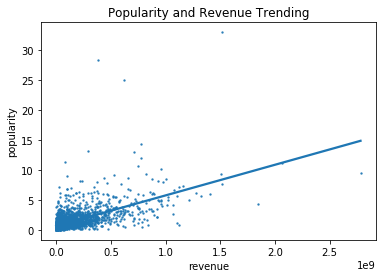

In [74]:
# For the revenue and popularity trending, took advantage of Seaborn's plot data and a linear regression model fit regplot package
# https://seaborn.pydata.org/generated/seaborn.regplot.html
sns.regplot(df_tmdb['revenue'],df_tmdb['popularity'],data=df_tmdb, scatter_kws={"s": 2}, order=1, ci=None, truncate=True)
plt.title('Popularity and Revenue Trending')

Text(0.5,1,'Popularity and Revenue Trending')

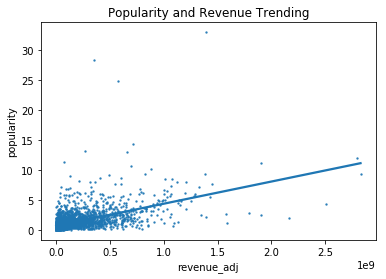

In [75]:
# for the revenue adj (2010 inflation) and popularity trending, took advantage of Seaborn's plot data and a linear regression model fit regplot package
# https://seaborn.pydata.org/generated/seaborn.regplot.html
sns.regplot(df_tmdb['revenue_adj'],df_tmdb['popularity'],data=df_tmdb, scatter_kws={"s": 2}, order=1, ci=None, truncate=True)
plt.title('Popularity and Revenue Trending')

### 3b) Which movie genres tend to result in higher generated revenue?  

In [76]:
# Assign each of the genres with an average revenue value
# https://stackoverflow.com/questions/30482071/how-to-calculate-mean-values-grouped-on-another-column-in-pandas
grouped_genrerevmean = df_tmdb_genre.groupby('genres', as_index=False)['revenue'].mean()
# sort each genre by mean revenue value
# https://stackoverflow.com/questions/27018622/pandas-groupby-sort-descending-order
sorted_genre_byrevmean = grouped_genrerevmean.sort_values('revenue', ascending=False)

Text(0.5,1,'Average Movie Revenue by Genre')

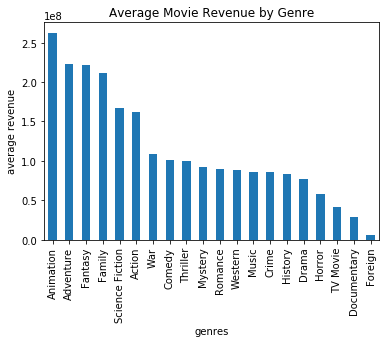

In [77]:
# Create a  bar chart of the different genres and their mean revenue
sorted_genre_byrevmean.sort_values('revenue', ascending=False)[['genres','revenue']].plot.bar(x='genres', legend=False)
plt.ylabel('average revenue')
plt.title('Average Movie Revenue by Genre')

The top 5 genres in the updated cleaned dataset by rank in descending order of highest average revenue are: 
> 1) Animation
> 2) Adventure
> 3) Fantasy
> 4) Family
> 5) Science Fiction

The bottom 5 genres in the updated cleaned dataset by rank in ascending order of lowest average revenue are: 
> 1) Foreign
> 2) Documentary
> 3) TV Movie
> 4) Horror
> 5) Drama

Does is make a difference if we replace revenue with the adjusted revenue for inflation in 2010? 

In [78]:
# Assign each of the genres with an average revenue (taking the 2010 adjustment for inflation into account) value
# https://stackoverflow.com/questions/30482071/how-to-calculate-mean-values-grouped-on-another-column-in-pandas
grouped_genrerevadjmean = df_tmdb_genre.groupby('genres', as_index=False)['revenue_adj'].mean()
# sort each genre by mean revenue (taking the 2010 adjustment for inflation into account) value
# https://stackoverflow.com/questions/27018622/pandas-groupby-sort-descending-order
sorted_genre_byrevadjmean = grouped_genrerevadjmean.sort_values('revenue_adj', ascending=False)

Text(0.5,1,'Average Movie Revenue (Adj 2010) by Genre')

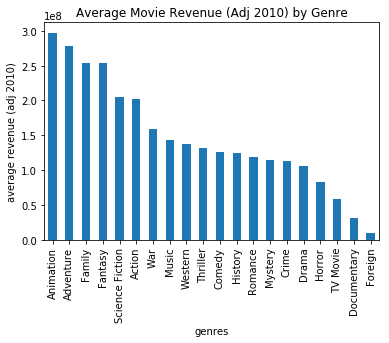

In [79]:
# Create a  bar chart of the different genres and their mean revenue (taking the 2010 adjustment for inflation into account) value
sorted_genre_byrevadjmean.sort_values('revenue_adj', ascending=False)[['genres','revenue_adj']].plot.bar(x='genres', legend=False)
plt.ylabel('average revenue (adj 2010)')
plt.title('Average Movie Revenue (Adj 2010) by Genre')

The top 5 genres in the updated cleaned dataset by rank in descending order of highest average revenue (taking 2010 adjustment for inflation into account) are: 
> 1) Animation
> 2) Adventure
> 3) Family
> 4) Fantasy
> 5) Science Fiction

The bottom 5 genres in the updated cleaned dataset by rank in ascending order of lowest average revenue (taking 2010 adjustment for inflation into account) are: 
> 1) Foreign
> 2) Documentary
> 3) TV Movie
> 4) Horror
> 5) Drama

Is there a difference when calculating the median revenue as opposed to the mean in case of potential existing outliers? 

In [80]:
# Assign each of the genres with a median revenue value
# https://stackoverflow.com/questions/30482071/how-to-calculate-mean-values-grouped-on-another-column-in-pandas
grouped_genrerevmedian = df_tmdb_genre.groupby('genres', as_index=False)['revenue'].median()
# sort each genre by median revenue value
# https://stackoverflow.com/questions/27018622/pandas-groupby-sort-descending-order
sorted_genre_byrevmedian = grouped_genrerevmedian.sort_values('revenue', ascending=False)

Text(0.5,1,'Median Movie Revenue by Genre')

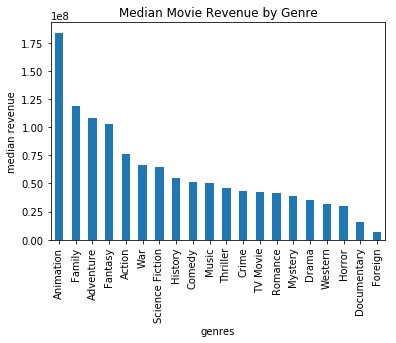

In [81]:
# Create a  bar chart of the different genres and their median revenue
sorted_genre_byrevmedian.sort_values('revenue', ascending=False)[['genres','revenue']].plot.bar(x='genres', legend=False)
plt.ylabel('median revenue')
plt.title('Median Movie Revenue by Genre')

The top 5 genres in the updated cleaned dataset by rank in descending order of highest median revenue are: 
> 1) Animation
> 2) Family 
> 3) Adventure
> 4) Fantasy
> 5) Action

The bottom 5 genres in the updated cleaned dataset by rank in ascending order of lowest median revenue are: 
> 1) Foreign
> 2) Documentary
> 3) Horror
> 4) Western
> 5) Drama

Does is make a difference if we replace revenue with the adjusted revenue for inflation in 2010? 

In [82]:
# Assign each of the genres with a median revenue (taking the 2010 adjustment for inflation into account) value
# https://stackoverflow.com/questions/30482071/how-to-calculate-mean-values-grouped-on-another-column-in-pandas
grouped_genrerevadjmedian = df_tmdb_genre.groupby('genres', as_index=False)['revenue_adj'].median()
# sort each genre by median revenue (taking the 2010 adjustment for inflation into account) value
# https://stackoverflow.com/questions/27018622/pandas-groupby-sort-descending-order
sorted_genre_byrevadjmedian = grouped_genrerevadjmedian.sort_values('revenue_adj', ascending=False)

Text(0.5,1,'Median Movie Revenue (Adj 2010) by Genre')

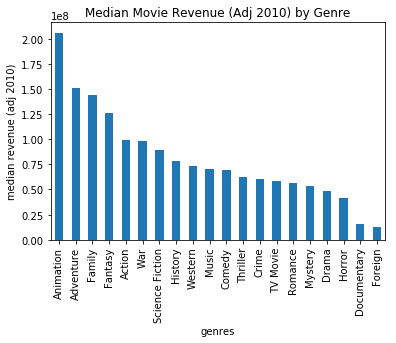

In [83]:
# Create a  bar chart of the different genres and their median revenue (taking the 2010 adjustment for inflation into account) value
sorted_genre_byrevadjmedian.sort_values('revenue_adj', ascending=False)[['genres','revenue_adj']].plot.bar(x='genres', legend=False)
plt.ylabel('median revenue (adj 2010)')
plt.title('Median Movie Revenue (Adj 2010) by Genre')

The top 5 genres in the updated cleaned dataset by rank in descending order of highest median revenue (taking 2010 adjustment for inflation into account) are: 
> 1) Animation
> 2) Adventure
> 3) Family
> 4) Action
> 5) War

The bottom 5 genres in the updated cleaned dataset by rank in ascending order of lowest median revenue (taking 2010 adjustment for inflation into account) are: 
> 1) Foreign
> 2) Documentary
> 3) Horror
> 4) Drama
> 5) TV Movie

### 3c) What keywords tend to associate with a bigger revenue? 

In [84]:
# Let's see if we can guess at least one of the top revenue generating movies by keywords only
# see http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html#pandas.DataFrame.sort_values
topkwords_by_rev = df_tmdb_keyword.sort_values(['revenue','keywords'], ascending=False)
top20kwords_by_rev = topkwords_by_rev[['revenue','keywords']].head(20)
top20kwords_by_rev

,revenue,keywords
1386,2.781506e+09,space war
1386,2.781506e+09,space colony
1386,2.781506e+09,society
1386,2.781506e+09,future
1386,2.781506e+09,culture clash
3,2.068178e+09,spaceship
3,2.068178e+09,space opera
3,2.068178e+09,jedi
3,2.068178e+09,android
3,2.068178e+09,3d


I'm not sure about the top movie (#1386), but the 2nd movie (#3) must be one from the Star Wars series. The third (#5231) appears to be The Titanic.  The 4th may be one of the Avengers movies.  
Let's see what they are...

In [85]:
# Top revenue generating movie
df_tmdb.loc[1386]

popularity            9.43277
budget               2.37e+08
revenue           2.78151e+09
original_title         Avatar
runtime                   162
vote_count               8458
vote_average              7.1
release_year             2009
budget_adj        2.40887e+08
revenue_adj       2.82712e+09
Name: 1386, dtype: object

In [86]:
# 2nd top revenue generating movie
df_tmdb.loc[3]

popularity                             11.1731
budget                                   2e+08
revenue                            2.06818e+09
original_title    Star Wars: The Force Awakens
runtime                                    136
vote_count                                5292
vote_average                               7.5
release_year                              2015
budget_adj                            1.84e+08
revenue_adj                        1.90272e+09
Name: 3, dtype: object

In [87]:
# 3rd top revenue generating movie
df_tmdb.loc[5231]

popularity            4.35522
budget                  2e+08
revenue           1.84503e+09
original_title        Titanic
runtime                   194
vote_count               4654
vote_average              7.3
release_year             1997
budget_adj        2.71692e+08
revenue_adj       2.50641e+09
Name: 5231, dtype: object

In [88]:
# 4th top revenue generating movie
df_tmdb.loc[4361]

popularity             7.63777
budget                 2.2e+08
revenue            1.51956e+09
original_title    The Avengers
runtime                    143
vote_count                8903
vote_average               7.3
release_year              2012
budget_adj         2.08944e+08
revenue_adj        1.44319e+09
Name: 4361, dtype: object

In [89]:
# Does the order change when accounting for the 2010 adjusted revenue?  
topkwords_by_revadj = df_tmdb_keyword.sort_values(['revenue_adj','keywords'], ascending=False)
top20kwords_by_revadj = topkwords_by_revadj[['revenue_adj','keywords']].head(20)
top20kwords_by_revadj

,revenue_adj,keywords
1386,2.827124e+09,space war
1386,2.827124e+09,space colony
1386,2.827124e+09,society
1386,2.827124e+09,future
1386,2.827124e+09,culture clash
1329,2.789712e+09,lightsaber
1329,2.789712e+09,hermit
1329,2.789712e+09,galaxy
1329,2.789712e+09,death star
1329,2.789712e+09,android


Yes. When accounting for the 2010 adjusted revenue, the keywords change and you see that the 2nd and 4th top grossing movies are replaced. One looks like it may be a different Star Wars movie and the other looks like it could be the Exorcist.  Let's see...

In [90]:
# 2nd top revenue (adjusted for 2010) generating movie
df_tmdb.loc[1329]

popularity            12.0379
budget                1.1e+07
revenue           7.75398e+08
original_title      Star Wars
runtime                   121
vote_count               4428
vote_average              7.9
release_year             1977
budget_adj        3.95756e+07
revenue_adj       2.78971e+09
Name: 1329, dtype: object

In [91]:
# 4th top revenue (adjusted for 2010) generating movie
df_tmdb.loc[10594]

popularity             2.01073
budget                   8e+06
revenue            4.41306e+08
original_title    The Exorcist
runtime                    122
vote_count                1113
vote_average               7.2
release_year              1973
budget_adj         3.92893e+07
revenue_adj        2.16732e+09
Name: 10594, dtype: object

Let's now find out the keywords that are associated with movies generating the highest average revenue.  

In [92]:
# Assign each of the keywords by the movies' mean revenue
# https://stackoverflow.com/questions/30482071/how-to-calculate-mean-values-grouped-on-another-column-in-pandas
grouped_keyrevmean = df_tmdb_keyword.groupby('keywords', as_index=False)['revenue'].mean()
# sort each keyword by the movies' mean revenue
# https://stackoverflow.com/questions/27018622/pandas-groupby-sort-descending-order
sorted_key_byrevmean = grouped_keyrevmean.sort_values('revenue', ascending=False)
sorted_key_byrevmean

,keywords,revenue
3978,space war,2.781506e+09
2120,iceberg,1.845034e+09
3969,space colony,1.659953e+09
3917,snowman,1.274219e+09
1405,evil mastermind,1.156731e+09
2718,minions,1.156731e+09
3973,space opera,1.093089e+09
320,barbie,1.063172e+09
1519,fantastic,1.025467e+09
69,alice in wonderland,1.025467e+09


We see that the top 10 keywords sorted by average revenue in descending order are: 
> 1) space war 2) iceberg	3) space colony 4) snowman 5) evil mastermind 6) minions 7) space opera 8) barbie 9) fantastic 
10) alice in wonderland	

We see that the bottom 10 keywords sorted by average revenue in ascending order are: 
> 1) shopping 2) farm worker 3) police psychologist 4) icelandic 5) emigration 6) darkside 7) anthology film 8) menschheit
9) horror anthology 10) goat

Does is make a difference if we replace revenue with the adjusted revenue for inflation in 2010? 

In [93]:
# Assign each of the keywords by the movies' mean revenue (adjusted for 2010 inflation)
# https://stackoverflow.com/questions/30482071/how-to-calculate-mean-values-grouped-on-another-column-in-pandas
grouped_keyrevmeanadj = df_tmdb_keyword.groupby('keywords', as_index=False)['revenue_adj'].mean()
# sort each keyword by the movies' mean revenue (adjusted for 2010 inflation)
# https://stackoverflow.com/questions/27018622/pandas-groupby-sort-descending-order
sorted_key_byrevmeanadj = grouped_keyrevmeanadj.sort_values('revenue_adj', ascending=False)
sorted_key_byrevmeanadj

,keywords,revenue_adj
3978,space war,2.827124e+09
1977,hermit,2.789712e+09
2442,lightsaber,2.789712e+09
2120,iceberg,2.506406e+09
3969,space colony,2.125875e+09
237,atlantic ocean,1.907006e+09
364,bathing,1.907006e+09
1053,dalmatian,1.574815e+09
1108,death star,1.508677e+09
4445,triceratops,1.388863e+09


We see that the top 10 keywords sorted by average revenue (adjusted for 2010 inflation) in descending order are: 
> 1) space war 2) hermit	3) lightsaber 4) iceberg 5) space colony 6) atlantic ocean 7) bathing 8) dalmation 9) death star 
10) triceratops	

We see that the bottom 10 keywords sorted by average revenue (adjusted for 2010 inflation) in ascending order are: 
> 1) shopping 2) police pyschologist 3) farm worker 4) icelandic 5) emigration 6) menschheit 7) darkside 8) anthology film
9) horror anthology 10) maori

Is there a difference when calculating the median revenue as opposed to the mean in case of potential existing outliers? 

In [94]:
# assign each of the keywords by the movies' median revenue
# https://stackoverflow.com/questions/30482071/how-to-calculate-mean-values-grouped-on-another-column-in-pandas
grouped_keyrevmedian = df_tmdb_keyword.groupby('keywords', as_index=False)['revenue'].median()
# sort each keyword by the movies' median revenue 
# https://stackoverflow.com/questions/27018622/pandas-groupby-sort-descending-order
sorted_key_byrevmedian = grouped_keyrevmedian.sort_values('revenue', ascending=False)
sorted_key_byrevmedian

,keywords,revenue
3978,space war,2.781506e+09
2120,iceberg,1.845034e+09
3969,space colony,1.659953e+09
3917,snowman,1.274219e+09
2718,minions,1.156731e+09
1405,evil mastermind,1.156731e+09
3973,space opera,1.093089e+09
320,barbie,1.063172e+09
1519,fantastic,1.025467e+09
69,alice in wonderland,1.025467e+09


We see that the top 10 keywords sorted by median revenue in descending order are: 
> 1) space war 2) iceberg	3) space colony 4) snowman 5) minions 6) evil mastermind 7) space opera 8) barbie 9) fantastic 
10) alice in wonderland	

We see that the bottom 10 keywords sorted by median revenue in ascending order are: 
> 1) shopping 2) farm worker 3) police psychologist 4) icelandic 5) emigration 6) horror anthology 7) menschheit 8) anthology film 9) darkside 10) goat

Does is make a difference if we replace revenue with the adjusted revenue for inflation in 2010? 

In [95]:
# Assign each of the keywords by the movies' median revenue (adjusted for 2010 inflation)
# https://stackoverflow.com/questions/30482071/how-to-calculate-mean-values-grouped-on-another-column-in-pandas
grouped_keyrevmedianadj = df_tmdb_keyword.groupby('keywords', as_index=False)['revenue_adj'].median()
# sort each keyword by the movies' mean revenue (adjusted for 2010 inflation)
# https://stackoverflow.com/questions/27018622/pandas-groupby-sort-descending-order
sorted_key_byrevmedianadj = grouped_keyrevmedianadj.sort_values('revenue_adj', ascending=False)
sorted_key_byrevmedianadj

,keywords,revenue_adj
3978,space war,2.827124e+09
1977,hermit,2.789712e+09
2442,lightsaber,2.789712e+09
2120,iceberg,2.506406e+09
3969,space colony,2.125875e+09
237,atlantic ocean,1.907006e+09
364,bathing,1.907006e+09
1053,dalmatian,1.574815e+09
4445,triceratops,1.388863e+09
3107,patriarch,1.277914e+09


We see that the top 10 keywords sorted by median revenue (adjusted for 2010 inflation) in descending order are: 
> 1) space war 2) hermit	3) lightsaber 4) iceberg 5) space colony 6) atlantic ocean 7) bathing 8) dalmation 9) triceratops 
10) patriarch

We see that the bottom 10 keywords sorted by median revenue (adjusted for 2010 inflation) in ascending order are: 
> 1) shopping 2) police pyschologist 3) farm worker 4) icelandic 5) emigration 6) menschheit 7) horror anthology 8) anthology film 9) darkside 10) maori

### 3d) Does a bigger budget result in bigger revenue? 

Text(0.5,1,'Budget and Revenue Trending')

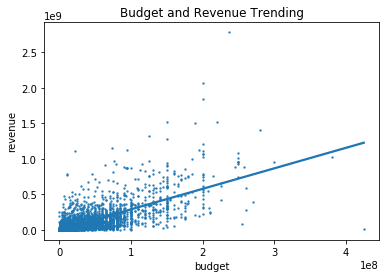

In [96]:
# For the budget and revenue trending, took advantage of Seaborn's plot data and a linear regression model fit regplot package
# https://seaborn.pydata.org/generated/seaborn.regplot.html
sns.regplot(df_tmdb['budget'],df_tmdb['revenue'],data=df_tmdb, scatter_kws={"s": 2}, order=1, ci=None, truncate=True)
plt.title('Budget and Revenue Trending')

Text(0.5,1,'Budget and Revenue Trending (2010 Adj)')

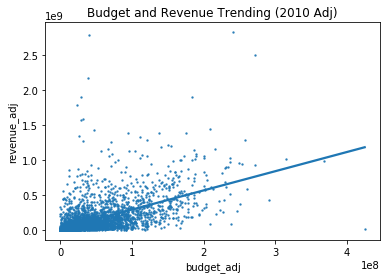

In [97]:
# For the budget and revenue trending, took advantage of Seaborn's plot data and a linear regression model fit regplot package
# https://seaborn.pydata.org/generated/seaborn.regplot.html
sns.regplot(df_tmdb['budget_adj'],df_tmdb['revenue_adj'],data=df_tmdb, scatter_kws={"s": 2}, order=1, ci=None, truncate=True)
plt.title('Budget and Revenue Trending (2010 Adj)')

### 3e) What cast members are associated with movies that generate higher revenue?  

In [98]:
# Assign each of the cast members who were cast in more than 5 movies with their movies' mean revenue
# https://stackoverflow.com/questions/30482071/how-to-calculate-mean-values-grouped-on-another-column-in-pandas
grouped_castrevmean = df_tmdb_cast.groupby('cast', as_index=False)['revenue'].mean()
# sort each cast member who were cast in more than 5 movies by their movies' mean revenue
# https://stackoverflow.com/questions/27018622/pandas-groupby-sort-descending-order
sorted_cast_byrevmean = grouped_castrevmean.sort_values('revenue', ascending=False)
sorted_cast_byrevmean

,cast,revenue
652,Rupert Grint,8.551820e+08
230,Emma Watson,6.799371e+08
166,Daniel Radcliffe,6.552531e+08
574,Orlando Bloom,5.908753e+08
101,Carrie Fisher,5.891694e+08
290,Ian McKellen,5.769208e+08
504,Martin Freeman,5.109080e+08
546,Michelle Rodriguez,4.925483e+08
666,Sam Worthington,4.452234e+08
705,Taylor Lautner,4.369355e+08


We see that the cast members in more than 5 movies with the highest average revenue by descending order are: 
> 1) Rupert Grint	2) Emma Watson 3) Daniel Radcliffe 4) Orlando Bloom 5) Carrie Fisher 6) Ian McKellen 7) Martin Freeman 8) Michelle Rodriguez 9) Sam Worthington 10) Taylor Lautner	

Conversely, we see that the cast members in more than 5 movies with the lowest average revenue by ascending order are:  
> 1) Jeremy Sisto 2) Clifton Collins, Jr. 3) Charles Bronson 4) Julie Delpy 5) Rutger Hauer 6) Evan Rachel Wood 7) Ben Johnson 8) Mia Farrow 9) Patricia Arquette 10) Judy Davis

Does is make a difference if we replace revenue with the adjusted revenue for inflation in 2010? 

In [99]:
# Assign each of the cast members who were cast in more than 5 movies with their movies' mean revenue (adjusted for 2010 inflation)
# https://stackoverflow.com/questions/30482071/how-to-calculate-mean-values-grouped-on-another-column-in-pandas
grouped_castrevmeanadj = df_tmdb_cast.groupby('cast', as_index=False)['revenue_adj'].mean()
# sort each cast member who were cast in more than 5 movies by their movies' mean revenue (adjusted for 2010 inflation)
# https://stackoverflow.com/questions/27018622/pandas-groupby-sort-descending-order
sorted_cast_byrevmeanadj = grouped_castrevmeanadj.sort_values('revenue_adj', ascending=False)
sorted_cast_byrevmeanadj

,cast,revenue_adj
101,Carrie Fisher,1.096897e+09
652,Rupert Grint,9.287045e+08
230,Emma Watson,7.325067e+08
166,Daniel Radcliffe,7.095902e+08
574,Orlando Bloom,6.788253e+08
290,Ian McKellen,6.163455e+08
411,Julie Andrews,5.560047e+08
546,Michelle Rodriguez,4.944280e+08
504,Martin Freeman,4.814855e+08
666,Sam Worthington,4.470681e+08


We see that the cast members in more than 5 movies with the highest average revenue (adjusted for 2010 inflation) by descending order are: 
> 1) Carrie Fisher 2) Rupert Grint	3) Emma Watson 4) Daniel Radcliffe 5) Orlando Bloom 6) Ian McKellen 7) Julie Andrews 8) Michelle Rodriguez 9) Martin Freeman 10) Sam Worthington

We see that the cast members in more than 5 movies with the lowest average revenue (adjusted for 2010 inflation) by ascending order are: 
> 1) Clifton Collins, Jr. 2) Jeremy Sisto 3) Julie Delpy 4) Evan Rachel Wood 5) Rutger Hauer 6) Derek Luke 7) Judy Davis 8) Pam Grier 9) Patricia Arquette 10) Hope Davis

Is there a difference when calculating the median revenue as opposed to the mean in case of potential existing outliers? 

In [100]:
# Assign each of the cast members who were cast in more than 5 movies with their movies' median revenue
# https://stackoverflow.com/questions/30482071/how-to-calculate-mean-values-grouped-on-another-column-in-pandas
grouped_castrevmedian = df_tmdb_cast.groupby('cast', as_index=False)['revenue'].median()
# sort each cast member who were cast in more than 5 movies by their movies' median revenue
# https://stackoverflow.com/questions/27018622/pandas-groupby-sort-descending-order
sorted_cast_byrevmedian = grouped_castrevmedian.sort_values('revenue', ascending=False)
sorted_cast_byrevmedian

,cast,revenue
652,Rupert Grint,933959197.0
230,Emma Watson,886304759.0
166,Daniel Radcliffe,886304759.0
290,Ian McKellen,752119925.5
574,Orlando Bloom,655011224.0
472,Liam Hemsworth,650523427.0
705,Taylor Lautner,545553986.0
101,Carrie Fisher,538400000.0
504,Martin Freeman,529799102.0
636,Robert Pattinson,392616625.0


We see that the cast members in more than 5 movies with the highest median revenue for all the movies they acted in by descending order are: 
> 1) Rupert Grint	2) Emma Watson 3) Daniel Radcliffe 4) Ian McKellen 5) Orlando Bloom 6) Liam Hemsworth 7) Taylor Lautner 8) Carrie Fisher 9) Martin Freeman 10) Robert Pattinson 

Conversely, we see that the cast members in more than 5 movies with the lowest median revenue for all the movies they acted in by ascending order are:  
> 1) Dylan Baker 2) Charles Bronson 3) Harry Dean Stanton 4) Michael Shannon 5) Evan Rachel Wood 7) Dolph Lundgren 8) Clifton Collins, Jr. 9) Ben Johnson 10) David Duchovny

Does is make a difference if we replace revenue with the adjusted revenue for inflation in 2010? 

In [101]:
# Assign each of the cast members who were cast in more than 5 movies with their movies' median revenue (adjusted for 2010 inflation)
# https://stackoverflow.com/questions/30482071/how-to-calculate-mean-values-grouped-on-another-column-in-pandas
grouped_castrevmedianadj = df_tmdb_cast.groupby('cast', as_index=False)['revenue_adj'].median()
# sort each cast member who were cast in more than 5 movies by their movies' median revenue (adjusted for 2010 inflation)
# https://stackoverflow.com/questions/27018622/pandas-groupby-sort-descending-order
sorted_cast_byrevmedianadj = grouped_castrevmedianadj.sort_values('revenue_adj', ascending=False)
sorted_cast_byrevmedianadj

,cast,revenue_adj
101,Carrie Fisher,1.253819e+09
652,Rupert Grint,9.866889e+08
166,Daniel Radcliffe,9.517912e+08
230,Emma Watson,9.517912e+08
574,Orlando Bloom,7.764193e+08
290,Ian McKellen,7.536493e+08
411,Julie Andrews,6.312593e+08
472,Liam Hemsworth,5.984813e+08
705,Taylor Lautner,5.440074e+08
504,Martin Freeman,4.982045e+08


We see that the cast members in more than 5 movies with the highest median revenue (adjusted for 2010 inflation) for all the movies they acted in by descending order are: 
> 1) Carrie Fisher 2) Rupert Grint	3) Daniel Radcliffe 4) Emma Watson 5) Orlando Bloom 6) Ian McKellen 7) Julie Andrews 8) Liam Hemsworth 9) Taylor Lautner 10) Martin Freeman

We see that the cast members in more than 5 movies with the lowest median revenue (adjusted for 2010 inflation) for all the movies they acted in by ascending order are: 
> 1) Dylan Baker 2) Michael Shannon 3) Evan Rachel Wood 4) David Duchovny 5) Ellen Page 6) Kristin Scott Thomas 7) Jeremy Sisto 8) Clifton Collins, Jr. 9) David Oyelowo 10) Kate Bosworth

### 3f) What production companies are associated with movies that generate higher revenue? 

In [102]:
# Assign each of the production companies that produced more than 5 movies with their movies' mean revenue
# https://stackoverflow.com/questions/30482071/how-to-calculate-mean-values-grouped-on-another-column-in-pandas
grouped_prodcorevmean = df_tmdb_prodco.groupby('production_companies', as_index=False)['revenue'].mean()
# sort each production company that produced more than 5 movies by their movies' mean revenue
# https://stackoverflow.com/questions/27018622/pandas-groupby-sort-descending-order
sorted_prodco_byrevmean = grouped_prodcorevmean.sort_values('revenue', ascending=False)
sorted_prodco_byrevmean

,production_companies,revenue
152,Lightstorm Entertainment,8.076264e+08
170,Marvel Studios,7.344987e+08
119,Heyday Films,7.341958e+08
202,Pixar Animation Studios,6.061762e+08
250,Syncopy,5.974994e+08
155,Lucasfilm,5.743606e+08
297,WingNut Films,5.466157e+08
33,Blue Sky Studios,4.865448e+08
24,Bad Robot,4.825986e+08
169,Marvel Entertainment,4.458277e+08


We see that the production companies who produced more than 5 movies with the highest average revenue for all their movies by descending order are: 
> 1) Lightstorm Entertainment	2) Marvel Studios 3) Heyday Films 4) Pixar Animation Studios 5) Syncopy 6) Lucasfilm 7) WingNut Films 8) Blue Sky Studios 9) Bad Robot 10) Marvel Entertainment	

Conversely, we see that the production companies who produced more than 5 movies with the lowest average revenue for all their movies by ascending order are:  
> 1) Foresight Unlimited 2) Destination Films 3) Golan-Globus Productions 4) Isle of Man Film 5) Screen Australia 6) Wild Bunch 7) Fine Line Features 8) Cannon Group 9) A24 10) Worldview Entertainment

In [103]:
# Assign each of the production companies that produced more than 5 movies with their movies' mean revenue (adjusted for 2010 inflation)
# https://stackoverflow.com/questions/30482071/how-to-calculate-mean-values-grouped-on-another-column-in-pandas
grouped_prodcorevmeanadj = df_tmdb_prodco.groupby('production_companies', as_index=False)['revenue_adj'].mean()
# sort each production company that produced more than 5 movies by their movies' mean revenue (adjusted for 2010 inflation)
# https://stackoverflow.com/questions/27018622/pandas-groupby-sort-descending-order
sorted_prodco_byrevmeanadj = grouped_prodcorevmeanadj.sort_values('revenue_adj', ascending=False)
sorted_prodco_byrevmeanadj

,production_companies,revenue_adj
152,Lightstorm Entertainment,9.899351e+08
155,Lucasfilm,9.564598e+08
119,Heyday Films,7.810156e+08
170,Marvel Studios,6.952093e+08
202,Pixar Animation Studios,6.510923e+08
62,Danjaq,5.971022e+08
250,Syncopy,5.864329e+08
297,WingNut Films,5.842064e+08
87,Eon Productions,5.574175e+08
33,Blue Sky Studios,4.914251e+08


We see that the production companies that produced more than 5 movies with the highest average revenue (adjusted for 2010 inflation) for all their movies by descending order are: 
> 1) Lightstorm Entertainment 2) Lucasfilm	3) Heyday Films 4) Marvel Studios 5) Pixar Animation Studios 6) Danjaq 7) Syncopy 8) WingNut Films 9) Eon Productions 10) Blue Sky Studios

We see that the production companies that produced more than 5 movies with the lowest average revenue (adjusted for 2010 inflation) for all their movies by ascending order are: 
> 1) Foresight Unlimited 2) Destination Films 3) Isle of Man Film 4) Screen Australia 5) Wild Bunch	6) A24 7) Worldview Entertainment 8) FilmNation Entertainment 9) Killer Films 10) Fine Line Features

Is there a difference when calculating the median revenue as opposed to the mean in case of potential existing outliers? 

In [104]:
# Assign each of the production companies that produced more than 5 movies with their movies' median revenue
# https://stackoverflow.com/questions/30482071/how-to-calculate-mean-values-grouped-on-another-column-in-pandas
grouped_prodcorevmedian = df_tmdb_prodco.groupby('production_companies', as_index=False)['revenue'].median()
# sort each production company that produced more than 5 movies by their movies' median revenue
# https://stackoverflow.com/questions/27018622/pandas-groupby-sort-descending-order
sorted_prodco_byrevmedian = grouped_prodcorevmedian.sort_values('revenue', ascending=False)
sorted_prodco_byrevmedian

,production_companies,revenue
119,Heyday Films,876688482.0
250,Syncopy,642298999.0
170,Marvel Studios,604553776.5
202,Pixar Animation Studios,561334326.0
297,WingNut Films,550000000.0
155,Lucasfilm,538400000.0
33,Blue Sky Studios,433946448.0
169,Marvel Entertainment,429777840.0
220,Roth Films,396600000.0
152,Lightstorm Entertainment,378882411.0


We see that the production companies that produced more than 5 movies with the highest median revenue for all their movies by descending order are: 
> 1) Heyday Films 2) Syncopy	3) Marvel Studios 4) Pixar Animation Studios 5) WingNut Films 6) Lucasfilm 7) Blue Sky Studios 8) Marvel Entertainment 9) Roth Films 10) Lightstorm Entertainment

We see that the production companies that produced more than 5 movies with the lowest median revenue for all their movies by ascending order are: 
> 1) Destination Films 2) Wild Bunch 3) Foresight Unlimited 4) Isle of Man Film 5) Fine Line Features	6) Killer Films	 7) TÃ©lÃ©film Canada 8) Worldview Entertainment 9) Empire Pictures 10) Screen Australia	

In [105]:
# Assign each of the production companies that produced more than 5 movies with their movies' median revenue (adjusted for 2010 inflation)
# https://stackoverflow.com/questions/30482071/how-to-calculate-mean-values-grouped-on-another-column-in-pandas
grouped_prodcorevmedianadj = df_tmdb_prodco.groupby('production_companies', as_index=False)['revenue_adj'].median()
# sort each production company that produced more than 5 movies by their movies' median revenue (adjusted for 2010 inflation)
# https://stackoverflow.com/questions/27018622/pandas-groupby-sort-descending-order
sorted_prodco_byrevmedianadj = grouped_prodcorevmedianadj.sort_values('revenue_adj', ascending=False)
sorted_prodco_byrevmedianadj

,production_companies,revenue_adj
119,Heyday Films,9.492765e+08
155,Lucasfilm,8.340611e+08
202,Pixar Animation Studios,6.454301e+08
297,WingNut Films,6.141098e+08
170,Marvel Studios,6.082950e+08
250,Syncopy,5.965681e+08
62,Danjaq,5.932280e+08
152,Lightstorm Entertainment,5.573783e+08
87,Eon Productions,5.039780e+08
33,Blue Sky Studios,4.626635e+08


We see that the production companies that produced more than 5 movies with the highest median revenue (adjusted for 2010 inflation) for all their movies by descending order are: 
> 1) Heyday Films 2) Lucasfilm	3) Pixar Animation Studios 4) WingNut Films 5) Marvel Studios 6) Syncopy 7) Danjaq 8) Lightstorm Entertainment 9) Eon Productions 10) Blue Sky Studios

We see that the production companies that produced more than 5 movies with the lowest median revenue (adjusted for 2010 inflation) for all their movies by ascending order are: 
> 1) Destination Films 2) Wild Bunch 3) Foresight Unlimited 4) Isle of Man Film 5) Worldview Entertainment	6) TÃ©lÃ©film Canada	 7) Killer Films 8) Fine Line Features 9) Screen Australia 10) A24

### 3g) Which directors tend to be associated with a bigger revenue?

In [106]:
# Assign each of the directors who directed more than 5 movies with their movies' mean revenue
# https://stackoverflow.com/questions/30482071/how-to-calculate-mean-values-grouped-on-another-column-in-pandas
grouped_dirrevmean = df_tmdb_director.groupby('director', as_index=False)['revenue'].mean()
# sort each director who directed more than 5 movies by their movies' mean revenue
# https://stackoverflow.com/questions/27018622/pandas-groupby-sort-descending-order
sorted_director_byrevmean = grouped_dirrevmean.sort_values('revenue', ascending=False)
sorted_director_byrevmean

,director,revenue
50,James Cameron,7.302369e+08
93,Peter Jackson,5.930222e+08
42,George Lucas,5.527585e+08
35,Francis Lawrence,5.299966e+08
16,Carlos Saldanha,5.294010e+08
18,Christopher Nolan,5.209436e+08
80,Michael Bay,4.470189e+08
17,Chris Columbus,4.139591e+08
44,Gore Verbinski,3.943089e+08
114,Sam Mendes,3.876498e+08


We see that the directors who directed more than 5 movies with the highest average revenue for all the movies they directed by descending order are: 
> 1) James Cameron	2) Peter Jackson 3) George Lucas 4) Francis Lawrence 5) Carlos Saldanha 6) Christopher Nolan 7) Michael Bay 8) Chris Columbus 9) Gore Verbinski 10) Sam Mendes	

Conversely, we see that the directors who directed more than 5 movies with the lowest average revenue for all the movies they directed by ascending order are:  
> 1) Alfred Hitchcock 2) David Lynch	3) Kevin Smith 4) George A. Romero 5) John Carpenter 6) David Cronenberg 7) Richard Linklater 8) Eli Roth	 9) Paul Thomas Anderson 10) Sidney Lumet

In [107]:
# Assign each of the directors who directed more than 5 movies with their movies' mean revenue (adjusted for 2010 inflation)
# https://stackoverflow.com/questions/30482071/how-to-calculate-mean-values-grouped-on-another-column-in-pandas
grouped_dirrevmeanadj = df_tmdb_director.groupby('director', as_index=False)['revenue_adj'].mean()
# sort each director who directed more than 5 movies by their movies' mean revenue (adjusted for 2010 inflation)
# https://stackoverflow.com/questions/27018622/pandas-groupby-sort-descending-order
sorted_director_byrevmeanadj = grouped_dirrevmeanadj.sort_values('revenue_adj', ascending=False)
sorted_director_byrevmeanadj

,director,revenue_adj
42,George Lucas,1.052320e+09
50,James Cameron,9.159026e+08
93,Peter Jackson,6.381680e+08
16,Carlos Saldanha,5.503941e+08
126,Steven Spielberg,5.452473e+08
17,Chris Columbus,5.437206e+08
18,Christopher Nolan,5.205327e+08
35,Francis Lawrence,5.113322e+08
80,Michael Bay,4.964247e+08
110,Roland Emmerich,4.529979e+08


We see that the directors who directed more than 5 movies with the highest average revenue (adjusted for 2010 inflation) for all the movies they directed by descending order are: 
> 1) George Lucas	2) James Cameron 3) Peter Jackson 4) Carlos Saldanha 5) Steven Spielberg 6) Chris Columbus 7) Christopher Nolan 8) Francis Lawrence 9) Michael Bay 10) Roland Emmerich	

Conversely, we see that the directors who directed more than 5 movies with the lowest average revenue (adjusted for 2010 inflation) for all the movies they directed by ascending order are:  
> 1) Kevin Smith 2) David Lynch	3) Eli Roth 4) Richard Linklater 5) Paul Thomas Anderson 6) David Cronenberg 7) George A. Romero 8) Spike Lee	 9) Brian Robbins 10) Gary Goldman

Is there a difference when calculating the median revenue as opposed to the mean in case of potential existing outliers? 

In [108]:
# Assign each of the directors who directed more than 5 movies with their movies' median revenue 
# https://stackoverflow.com/questions/30482071/how-to-calculate-mean-values-grouped-on-another-column-in-pandas
grouped_dirrevmedian = df_tmdb_director.groupby('director', as_index=False)['revenue'].median()
# sort each director who directed more than 5 movies by their movies' median revenue
# https://stackoverflow.com/questions/27018622/pandas-groupby-sort-descending-order
sorted_director_byrevmedian = grouped_dirrevmedian.sort_values('revenue', ascending=False)
sorted_director_byrevmedian

,director,revenue
93,Peter Jackson,871368364.0
42,George Lucas,712398167.5
35,Francis Lawrence,617936218.5
18,Christopher Nolan,497985576.5
16,Carlos Saldanha,492412097.5
17,Chris Columbus,358991681.0
80,Michael Bay,335062621.0
126,Steven Spielberg,302321729.0
108,Robert Zemeckis,275201656.5
110,Roland Emmerich,266000000.0


We see that the directors who directed more than 5 movies with the highest median revenue for all the movies they directed by descending order are: 
> 1) Peter Jackson	2) George Lucas 3) Francis Lawrence 4) Christopher Nolan 5) Carlos Saldanha 6) Chris Columbus 7) Michael Bay 8) Steven Spielberg 9) Robert Zemeckis 10) Roland Emmerich	

Conversely, we see that the directors who directed more than 5 movies with the lowest median revenue for all the movies they directed by ascending order are:  
> 1) Richard Linklater 2) David Lynch	3) Alfred Hitchcock 4) John Carpenter 5) George A. Romero 6) David Cronenberg 7) Woody Allen 8) Walter Hill	 9) Spike Lee 10) Gary Goldman

In [109]:
# Assign each of the directors who directed more than 5 movies with their movies' median revenue (adjusted for 2010 inflation)
# https://stackoverflow.com/questions/30482071/how-to-calculate-mean-values-grouped-on-another-column-in-pandas
grouped_dirrevmedianadj = df_tmdb_director.groupby('director', as_index=False)['revenue_adj'].median()
# sort each director who directed more than 5 movies by their movies' median revenue (adjusted for 2010 inflation)
# https://stackoverflow.com/questions/27018622/pandas-groupby-sort-descending-order
sorted_director_byrevmedianadj = grouped_dirrevmedianadj.sort_values('revenue_adj', ascending=False)
sorted_director_byrevmedianadj

,director,revenue_adj
93,Peter Jackson,8.797523e+08
42,George Lucas,8.681597e+08
35,Francis Lawrence,6.070372e+08
17,Chris Columbus,5.578818e+08
18,Christopher Nolan,4.952647e+08
16,Carlos Saldanha,4.672064e+08
80,Michael Bay,4.658097e+08
50,James Cameron,4.090552e+08
126,Steven Spielberg,3.937063e+08
55,Joe Johnston,3.592296e+08


We see that the directors who directed more than 5 movies with the highest median revenue (adjusted for 2010 inflation) for all the movies they directed by descending order are: 
> 1) George Lucas	2) Francis Lawrence 3) Chris Columbu 4) Christopher Nolan 5) Carlos Saldanha 6) Michael Bay 7) Christopher Nolan 8) James Cameron 9) Steven Spielberg 10) Joe Johnston	

Conversely, we see that the directors who directed more than 5 movies with the lowest median revenue (adjusted for 2010 inflation) for all the movies they directed by ascending order are:  
> 1) Richard Linklater 2) David Lynch	3) Paul Thomas Anderson 4) Spike Lee 5) Paul Weitz 6) Kevin Smith 7) John Carpenter	 8) David Cronenberg	 9) Darren Aronofsky 10) Eli Roth

### 3h) Does a higher vote average tend to be associated with a bigger revenue?

Text(0.5,1,'Vote Average and Revenue Trending')

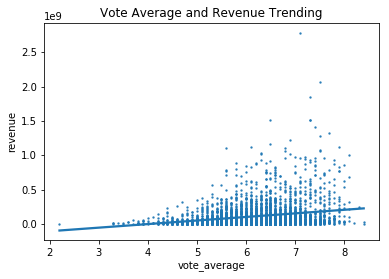

In [110]:
# For the vote average and revenue trending, took advantage of Seaborn's plot data and a linear regression model fit regplot package
# https://seaborn.pydata.org/generated/seaborn.regplot.html
sns.regplot(df_tmdb['vote_average'],df_tmdb['revenue'],data=df_tmdb, scatter_kws={"s": 2}, order=1, ci=None, truncate=True)
plt.title('Vote Average and Revenue Trending')

Text(0.5,1,'Vote Average and Revenue Trending (2010 Adj)')

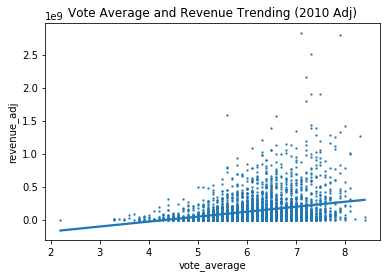

In [111]:
# For the vote average and revenue trending, took advantage of Seaborn's plot data and a linear regression model fit regplot package
# https://seaborn.pydata.org/generated/seaborn.regplot.html
sns.regplot(df_tmdb['vote_average'],df_tmdb['revenue_adj'],data=df_tmdb, scatter_kws={"s": 2}, order=1, ci=None, truncate=True)
plt.title('Vote Average and Revenue Trending (2010 Adj)')

<a id='conclusions'></a>
## Conclusions

My objective of this project was to investigate information about movies collected from The Movie Database (TMDB) to investigate and obtain additional insight.  After reviewing the properties and cleaning the data, during exploration the resulting dataset first reflects that the movies trend to increase in number, popularity and budget over the years from 1960 to 2015.  What’s interesting however, is that there are attributes reflecting adjustments from 2010 in both budget and revenue to account for inflation.  Even though the budget adjustment reflects an overall trending increase of movies over the years, the 2010 adjusted revenue reflects a trending decrease, most likely an ongoing downward trend when it comes to movie ticket sales.  As an assumption outside of this dataset, this could be due to the advent of the internet and in turn, more interest in the internet along with the development of streaming entertainment which prompts more people to stay at home. In addition, ticket prices have increased over the years.  These ticket price increases compensate the fact that not many people go to the movies anymore.    

Most movies appear to be most clustered in their runtime between 100 and 150 minutes. It’s also interesting to note that when accounting for the trending of runtime of movies in minutes, movies have gradually become shorter in runtime over the years. 

Both popular movies and revenue generating movies trend positively.  However, the top 4 popular movies were not included in the top 4 movies that generated the most revenue.  Some of the characteristics that we considered when comparing popular movies vs. revenue generating movies were: genres, keywords, cast, production companies, and directors.  I will go into the first 3 characteristics in detail. 

The top 3 most abundant movie genres in order are drama, comedy, and thriller.  However, when taking the mean of the popularity rating, the movies in genres are, adventure, science fiction, and fantasy. In turn, taking the median, the movie genres in order are animation, fantasy, and adventure. Therefore, the data reflects that the common genre between both the top 3 of the average and median popularity subsets is adventure.  The bottom 3 genres for both mean and median are foreign, documentary, and tv movie. 

The top 3 genres when taking the revenue mean into account are animation, adventure, and fantasy.  For mean revenue adjusting for inflation or median revenue whether you adjust for inflation or not, the top 3 genres are animation, adventure, and family.  The bottom ranking genres when taking the mean revenue into account, whether you adjust for inflation or not, are foreign, documentary and tv movie. The bottom ranking genres when taking the median revenue into account, again, whether you adjust for inflation or not, are foreign, documentary, and horror. The higher generating movies tend to be animation and adventure, while the lower revenue generating movies tend to be of the foreign or documentary genres.  

The top 3 most abundant movie keywords in order are based on novel, duringcreditsstinger, and dystopia. However, the top keywords when taking the mean or median of the popularity rating are scene during end credits, lightsaber, and hermit. The bottom keywords are soviet troops, joseph stalin, and forbidden zone. 
The top 3 keywords when taking the revenue mean or median into account are space war, iceberg, and space colony. The bottom 3 keywords are shopping, farm worker, and police psychologist. The top 3 keywords when taking the revenue mean (or median) adjusted for inflation into account are space war, hermit, and lightsaber. The bottom 3 keywords are shopping, police psychologist, and farm worker. 

The top 3 abundant cast who played in the most movies are Robert De Niro, Bruce Willis, and Samuel L. Jackson. For cast (as well as production companies and director), I decided to add a threshold of a value of more than 5 since many of the cast members who were included in the average top popular movies were unknown to me and played in very few movies. Initially, the cast members who had the highest mean popularity score prior to the threshold being added are Nick Robinson, Josh Helman, and Hugh Keays-Byrne.  After including the threshold of having to act in at least 6 movies, the top 3 changed to Chris Pratt, Bryce Dallas Howard, and Nicholas Hoult. The bottom three were Derek Luke, Ben Johnson, and Mia Farrow. The top 3 cast who had the highest median popularity score are reflected as Rupert Grint, Daniel Radcliffe, and Emma Watson.  The bottom 3 cast reflected are Lara Flynn Boylfe, Dave Chappelle, and Chi McBride. 

The top 3 cast who were in movies that generated the highest average or median revenue are Robert Grint, Emma Watson, and Daniel Radcliffe. The cast at the bottom for mean revenue are Jeremy Sisto, Clifton Collins, Jr. and Charles Bronson. The cast at the bottom for median revenue are Dylan Baker, Charles Bronson, and Harry Dean Stanton. If the adjusted inflation is applied, the top 3 cast with the highest mean revenue are Carrie Fisher, Rupert Grint, and Emma Watson.  For adjusted median revenue, it’s the same top 2 as the adjusted mean revenue, except switching out Emma Watson with Daniel Radcliffe. The cast at the bottom for mean adjusted revenue are Clifton Collins, Jr., Jeremy Sisto, and Julie Delpy. For median adjusted revenue, the bottom 3 cast are Dylan Baker, Michael Shannon, and Evan Rachel Wood. 
  
**Limitations of the data:** 
Several of the attributes that I found valuable for investigating the dataset resulted in containing an extraordinary amount of null values or zeros. Regarding the inclusion of zeros, revenue and revenue_adj included more than 55%, budget and budget_adj included more than 52%, and runtime, less than 1%. Keywords had null values of over 13%, production companies, over 9%, while cast, director, and keywords had the fewest null values at under 1% each. Since I did not want to introduce any bias or make mistakes in the analysis since I’m dealing with incomplete data, I decided to apply listwise deletion (as opposed to filling in the value i.e. mean, etc), removing the rows of any movies that included zeros or null values in one of the aforementioned attributes. The resulting dataset after cleaning the data in the wrangling stage, turned out to be a much reduced subset by two thirds of the original. Since so much data was removed, this cleaned dataset may not properly represent the true population. 